In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**DATA CLEANING**

In [ ]:
import pandas as pd

file_path = "/content/test N°X 2.0.csv"

# 🔍 Étape 1 : Lire et afficher les 10 premières lignes
with open(file_path, "r", encoding="utf-8-sig") as f:
    lines = f.readlines()

print("📌 Aperçu des 10 premières lignes du fichier :\n")
for i, line in enumerate(lines[:10]):
    print(f"Ligne {i+1}: {line.strip()}")

# 🔎 Étape 2 : Vérifier si certaines lignes ont un nombre anormal de colonnes
expected_cols = lines[0].count(";") + 1  # Nombre de colonnes attendu d'après l'en-tête

print("\n🔍 Vérification des lignes problématiques :")
for i, line in enumerate(lines[1:], start=2):  # On commence à la ligne 2 (1 en-tête)
    cols = line.count(";") + 1
    if cols != expected_cols:
        print(f"❌ Ligne {i} : {cols} colonnes au lieu de {expected_cols}")

# 📊 Étape 3 : Charger le fichier CSV avec Pandas
try:
    df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")
    print("\n✅ Fichier chargé avec succès !")
    print(df.head())  # Afficher les 5 premières lignes
except pd.errors.ParserError as e:
    print("\n❌ Erreur lors du chargement du fichier :", e)
    print("\n⚠️ Tentative de lecture en ignorant les erreurs...")
    df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig", on_bad_lines="skip")
    print("\n✅ Fichier chargé en sautant les lignes problématiques !")
    print(df.head())

📌 Aperçu des 10 premières lignes du fichier :

Ligne 1: title;release_date;genres;original_language;vote_average;vote_count;popularity;budget;production_companies;revenue;runtime
Ligne 2: Fast X;17/05/2023; Action, Crime, Thriller ;English;7.4;1347;8363.473;340000000; Universal Pictures, Original Film, One Race, Perfect Storm Entertainment ;652000000;142
Ligne 3: John Wick  Chapter 4;22/03/2023; Action, Thriller, Crime ;English;7.9;2896;4210.313;90000000; Thunder Road, 87Eleven, Summit Entertainment, Studio Babelsberg ;431769198;170
Ligne 4: The Super Mario Bros. Movie;05/04/2023; Animation, Family, Adventure, Fantasy, Comedy ;English;7.8;4628;3394.458;100000000; Universal Pictures, Illumination, Nintendo ;1308766975;92
Ligne 5: Spider-Man  Across the Spider-Verse;31/05/2023; Action, Adventure, Animation, Science Fiction ;English;8.8;1160;2859.047;100000000; Columbia Pictures, Sony Pictures Animation, Marvel Entertainment, Lord Miller, Pascal Pictures, Arad Productions ;313522201;140
L

In [ ]:
df.shape

(10000, 11)

In [62]:
df.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'budget', 'production_companies', 'revenue',
       'runtime'],
      dtype='object')

**Langue originale des films**

In [63]:
df['original_language'].unique()

array(['English', 'Spanish', 'Finnish', 'Polish', 'German', 'Korean',
       'Chinese', 'Japanese', 'French', 'Dutch', 'Portuguese', 'Italian',
       'Danish', 'Tagalog', 'Ukrainian', 'Russian', 'Norwegian',
       'Romanian', 'Tamil', 'Swedish', 'Telugu', 'Icelandic', 'Turkish',
       'Basque', 'cn', 'Indonesian', 'Thai', 'Macedonian', 'Arabic',
       'Serbian', 'Hindi', 'sh', 'Vietnamese', 'Bulgarian', 'Galician',
       'Greek', 'Lao', 'Persian', 'Catalan', 'xx', 'Czech', 'Malayalam',
       'Irish', 'Hebrew', 'Oriya', 'Kannada', 'Bosnian',
       'Norwegian Bokmal', 'Haitian', 'Khmer', 'Hungarian', 'Dzongkha'],
      dtype=object)

**Recherche de ligne manquant de l'information "genre" pour les supprimer**

In [66]:
df[df['genres'].str.len() == 2]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime


**Recherche de ligne mon compte avec l'information “compagnie de production” pour les supprimer **

In [67]:
df[df['production_companies'].str.len() == 2]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
3821,The Weekend Away,03/03/2022,"Thriller, Mystery",English,6.0,572,21.723,0.0,42,0.0,90.0


In [68]:
df = df[~(df['production_companies'].str.len() == 2)]

In [69]:
(df == 0).sum()

,0
title,0
release_date,0
genres,0
original_language,0
vote_average,290
vote_count,289
popularity,0
budget,4648
production_companies,0
revenue,4394


In [70]:
df[(df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0)]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
84,Spider-Man Beyond the Spider-Verse,27/03/2024,"Animation, Action, Adventure, Science Fiction",English,0.0,0,245.865,0.0,"Columbia Pictures, Sony Pictures Animation, M...",0.0,0.0
122,Tayuan,23/06/2023,Drama,Tagalog,0.0,0,187.835,0.0,Vivamax,0.0,0.0
174,Meg 2 The Trench,02/08/2023,"Action, Science Fiction, Horror",English,0.0,0,146.569,130178.0,"Apelles Entertainment, Warner Bros. Pictures,...",0.0,116.0
183,Barbie,19/07/2023,Comedy,English,0.0,0,143.021,100000000.0,"LuckyChap Entertainment, Heyday Films, Mattel...",0.0,104.0
233,Fast X Part 2,04/04/2025,"Action, Crime, Thriller",English,0.0,0,125.094,0.0,"Universal Pictures, One Race, Original Film, ...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9796,The Quest for Tom Sawyer s Gold,22/06/2023,"Adventure, Family",English,0.0,0,12.462,0.0,"Ace Entertainment Films, Grindstone Entertain...",0.0,88.0
9819,Crash,15/06/2023,Drama,German,0.0,0,12.440,0.0,Via Film,0.0,0.0
9857,Day Dreaming,15/06/2023,"Comedy, Fantasy",Chinese,0.0,0,12.413,0.0,,0.0,0.0
9942,Enter the Clones of Bruce,10/06/2023,Documentary,English,0.0,0,12.342,0.0,Severin Films,0.0,100.0


In [71]:
df = df[~((df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0))]

In [72]:
df.describe()

,vote_average,vote_count,popularity,budget,revenue,runtime
count,9645.000000,9645.000000,9645.000000,9.644000e+03,9.644000e+03,9644.000000
mean,6.513313,1615.486884,33.822382,2.043078e+07,6.308185e+07,102.991497
std,0.970780,2924.815162,128.717162,3.871412e+07,1.576932e+08,24.178853
min,1.000000,1.000000,12.297000,0.000000e+00,0.000000e+00,2.000000
25%,6.000000,169.000000,14.592000,0.000000e+00,0.000000e+00,91.000000
50%,6.600000,564.000000,18.571000,2.000000e+06,3.477201e+06,101.000000
75%,7.200000,1660.000000,28.040000,2.500000e+07,5.550529e+07,115.000000
max,10.000000,33822.000000,8363.473000,4.600000e+08,2.923706e+09,366.000000


**Création d'une colonne profit/rentabilité**

In [74]:
df['profit'] = df['revenue'] - df['budget']

In [75]:
df.head()

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,profit
0,Fast X,17/05/2023,"Action, Crime, Thriller",English,7.4,1347,8363.473,340000000.0,"Universal Pictures, Original Film, One Race, ...",6.520000e+08,142.0,3.120000e+08
1,John Wick Chapter 4,22/03/2023,"Action, Thriller, Crime",English,7.9,2896,4210.313,90000000.0,"Thunder Road, 87Eleven, Summit Entertainment,...",4.317692e+08,170.0,3.417692e+08
2,The Super Mario Bros. Movie,05/04/2023,"Animation, Family, Adventure, Fantasy, Comedy",English,7.8,4628,3394.458,100000000.0,"Universal Pictures, Illumination, Nintendo",1.308767e+09,92.0,1.208767e+09
3,Spider-Man Across the Spider-Verse,31/05/2023,"Action, Adventure, Animation, Science Fiction",English,8.8,1160,2859.047,100000000.0,"Columbia Pictures, Sony Pictures Animation, M...",3.135222e+08,140.0,2.135222e+08
4,Hypnotic,11/05/2023,"Mystery, Thriller, Science Fiction",English,6.5,154,2654.854,70000000.0,"Studio 8, Solstice Productions, Ingenious Med...",0.000000e+00,94.0,-7.000000e+07


In [76]:
df.to_csv("movies.csv", index=False)

**EXPLOITATION DE DONNÉES**

In [79]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
#max_va

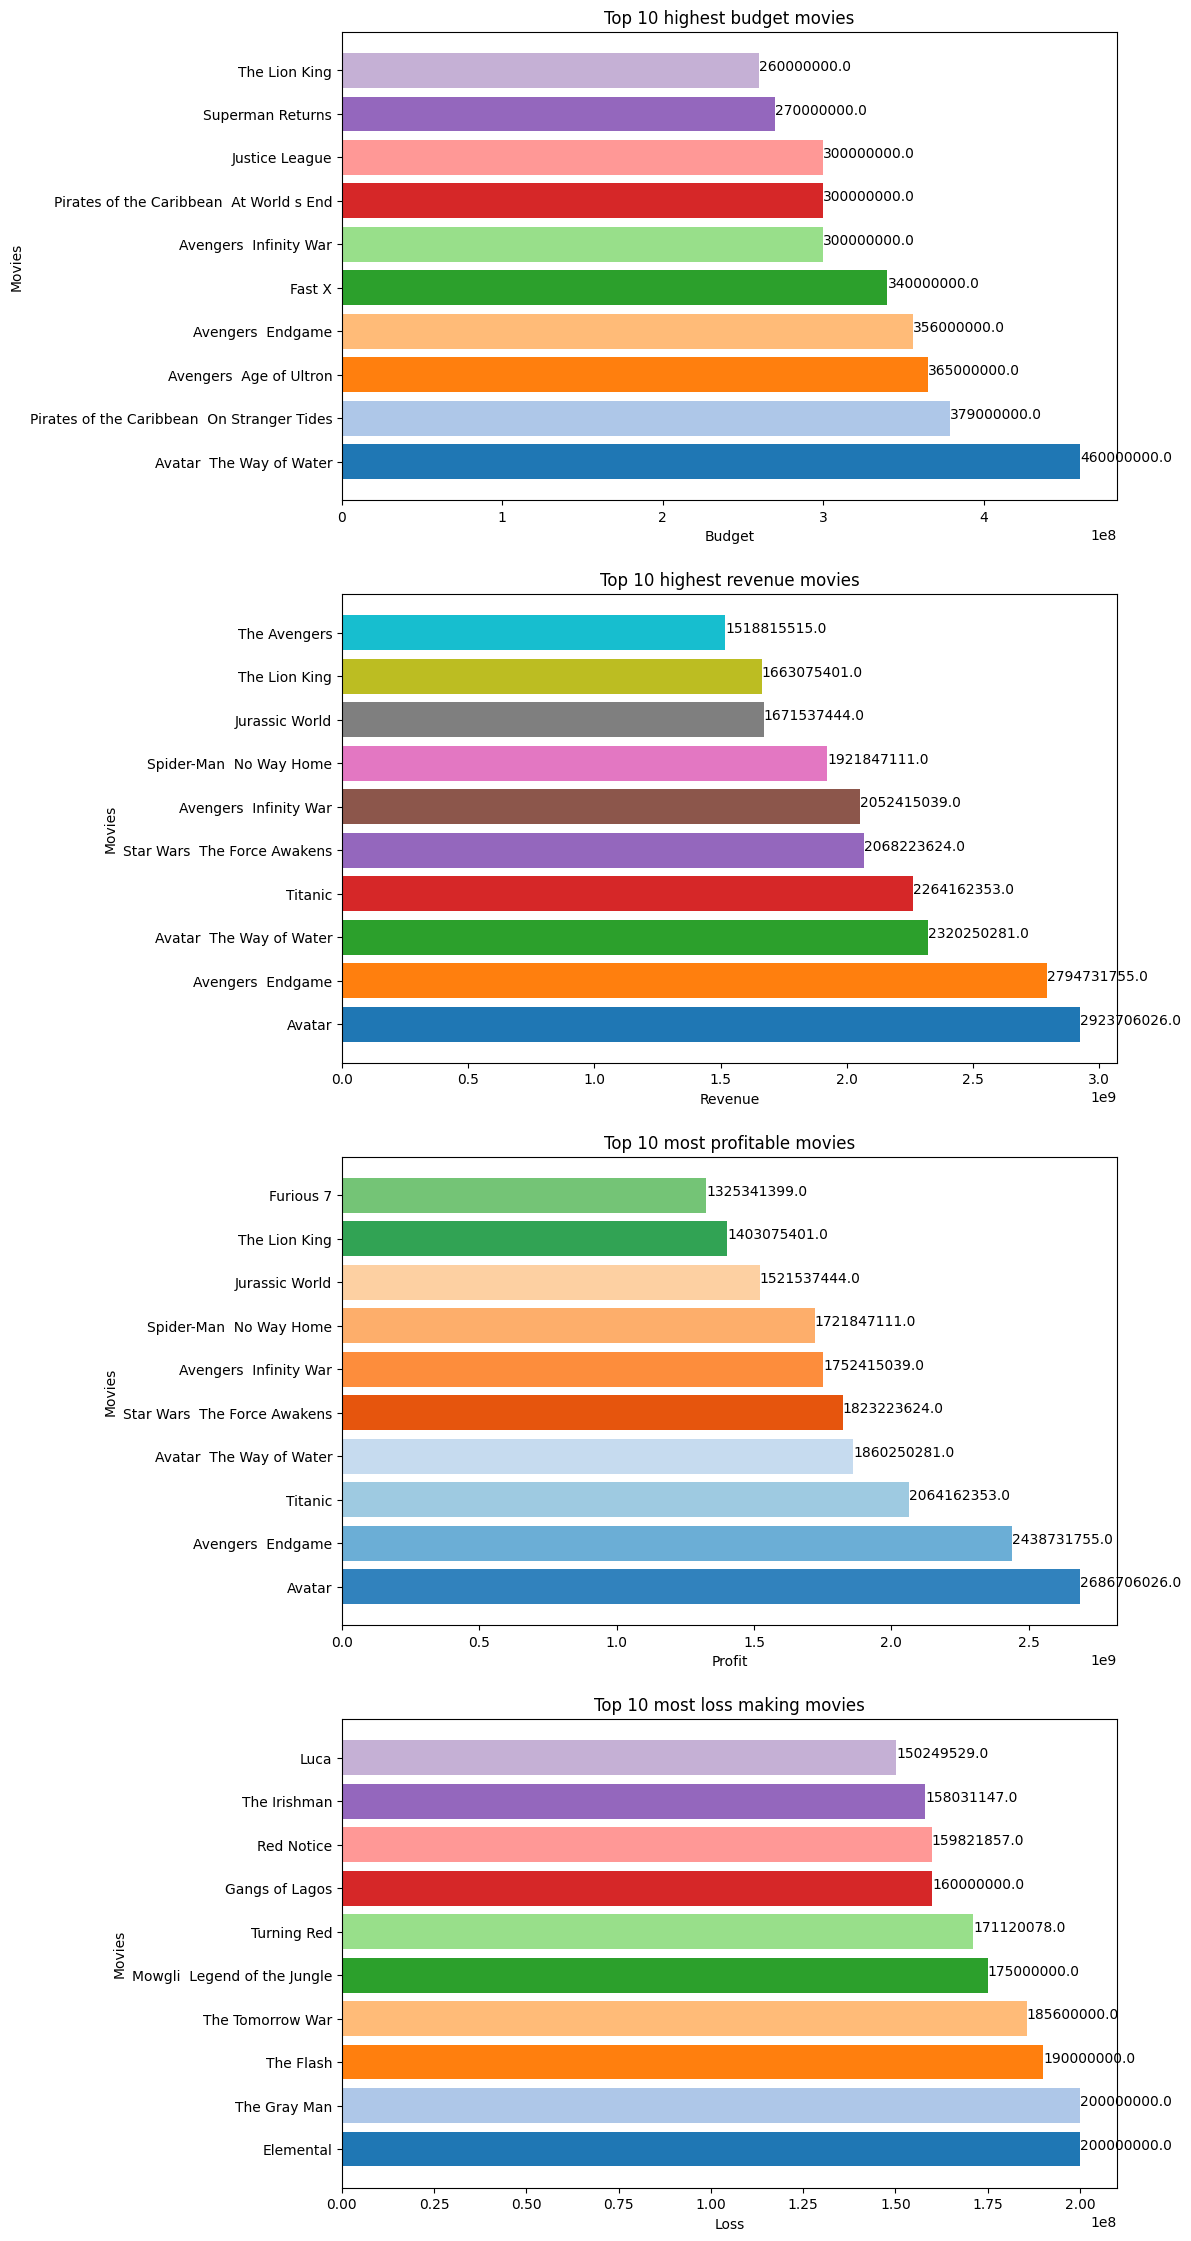

In [80]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])

col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

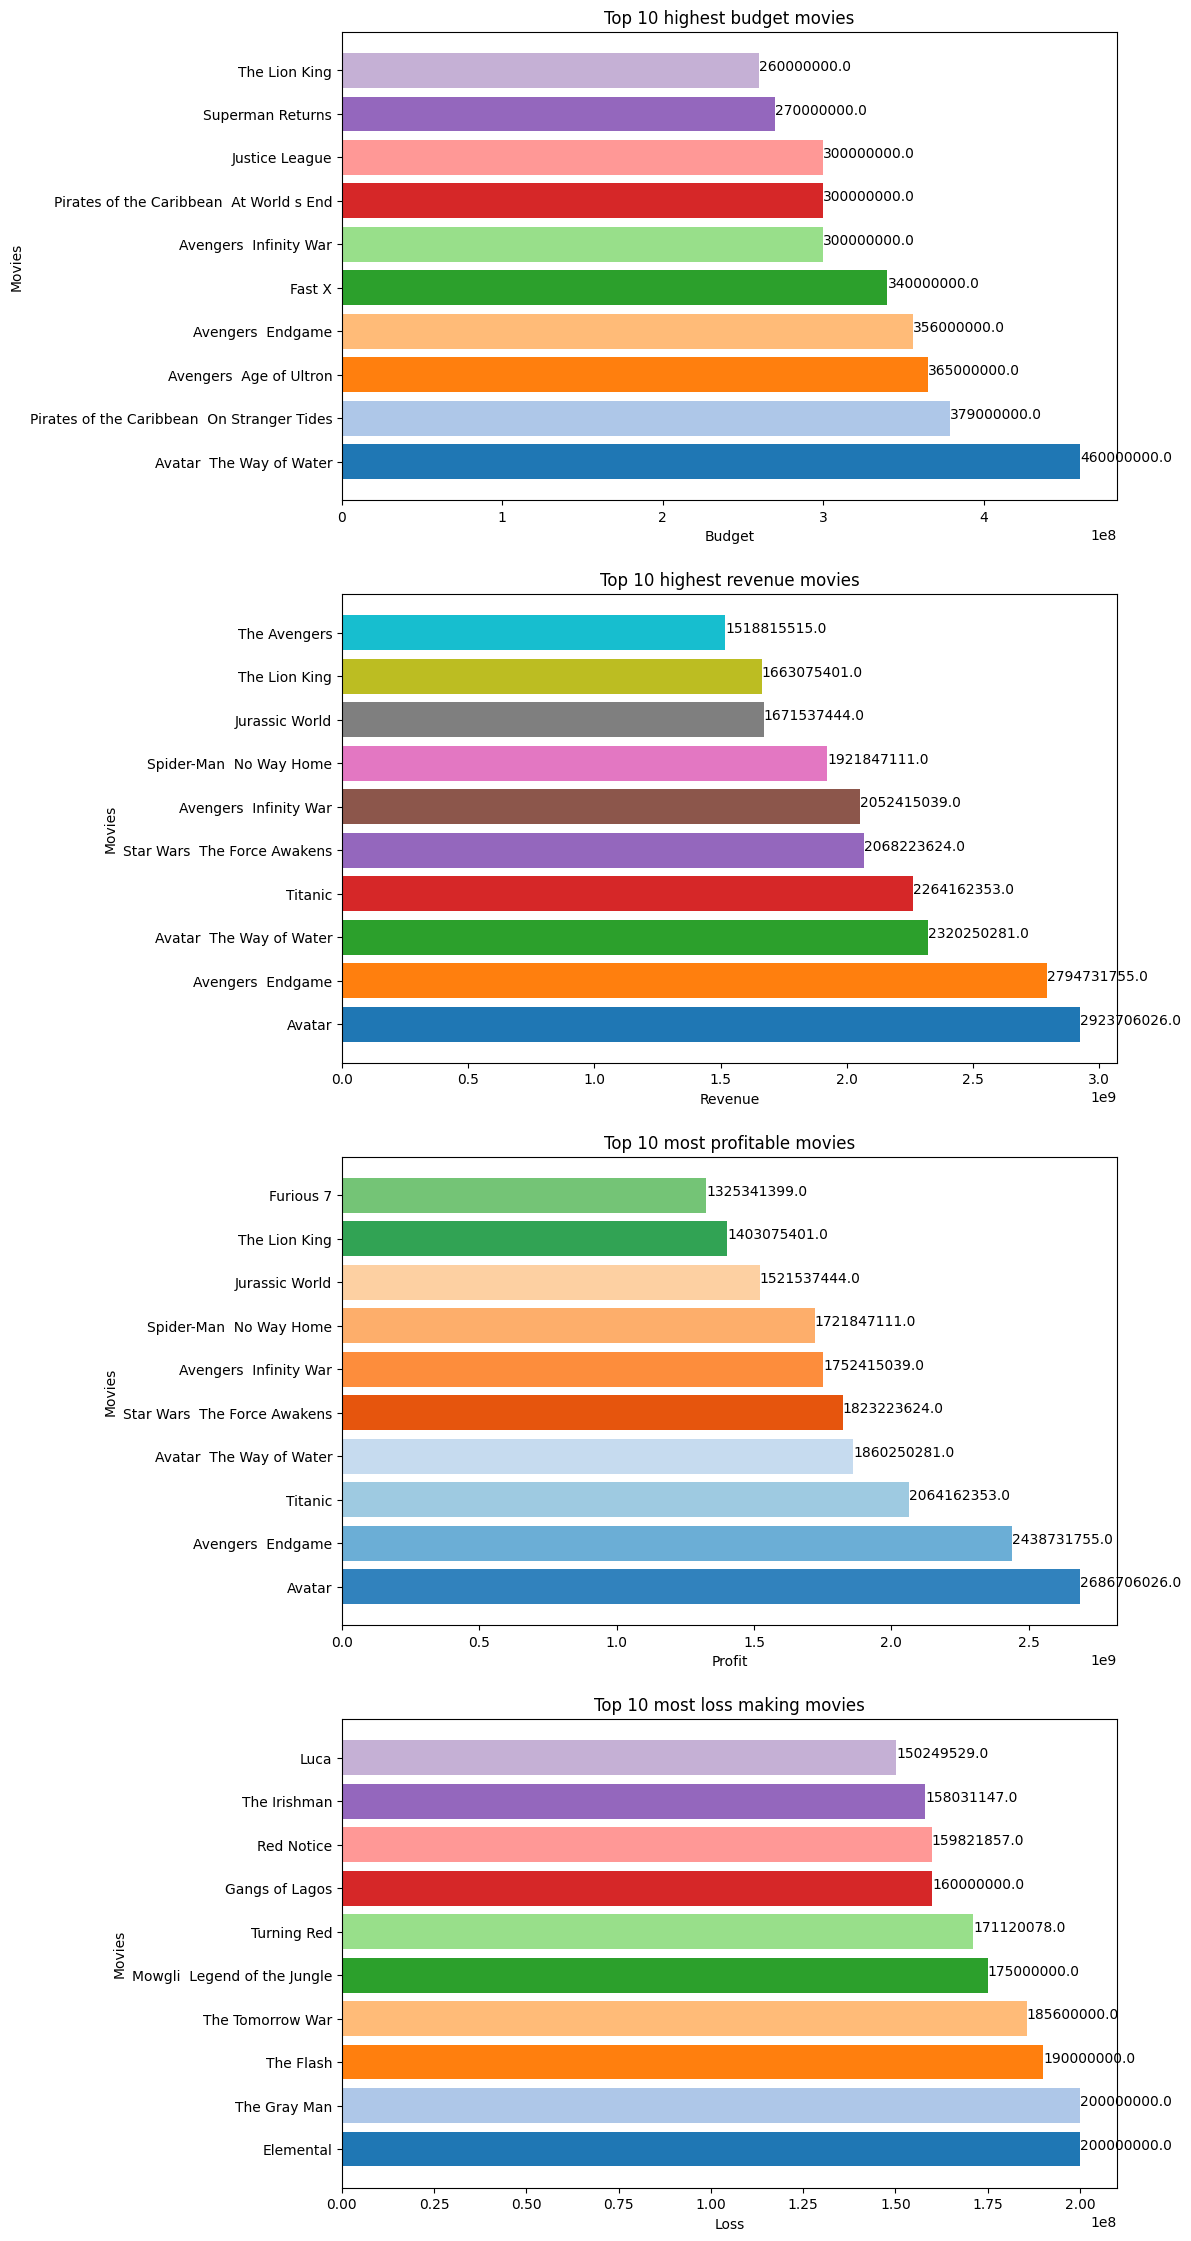

In [81]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])

col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

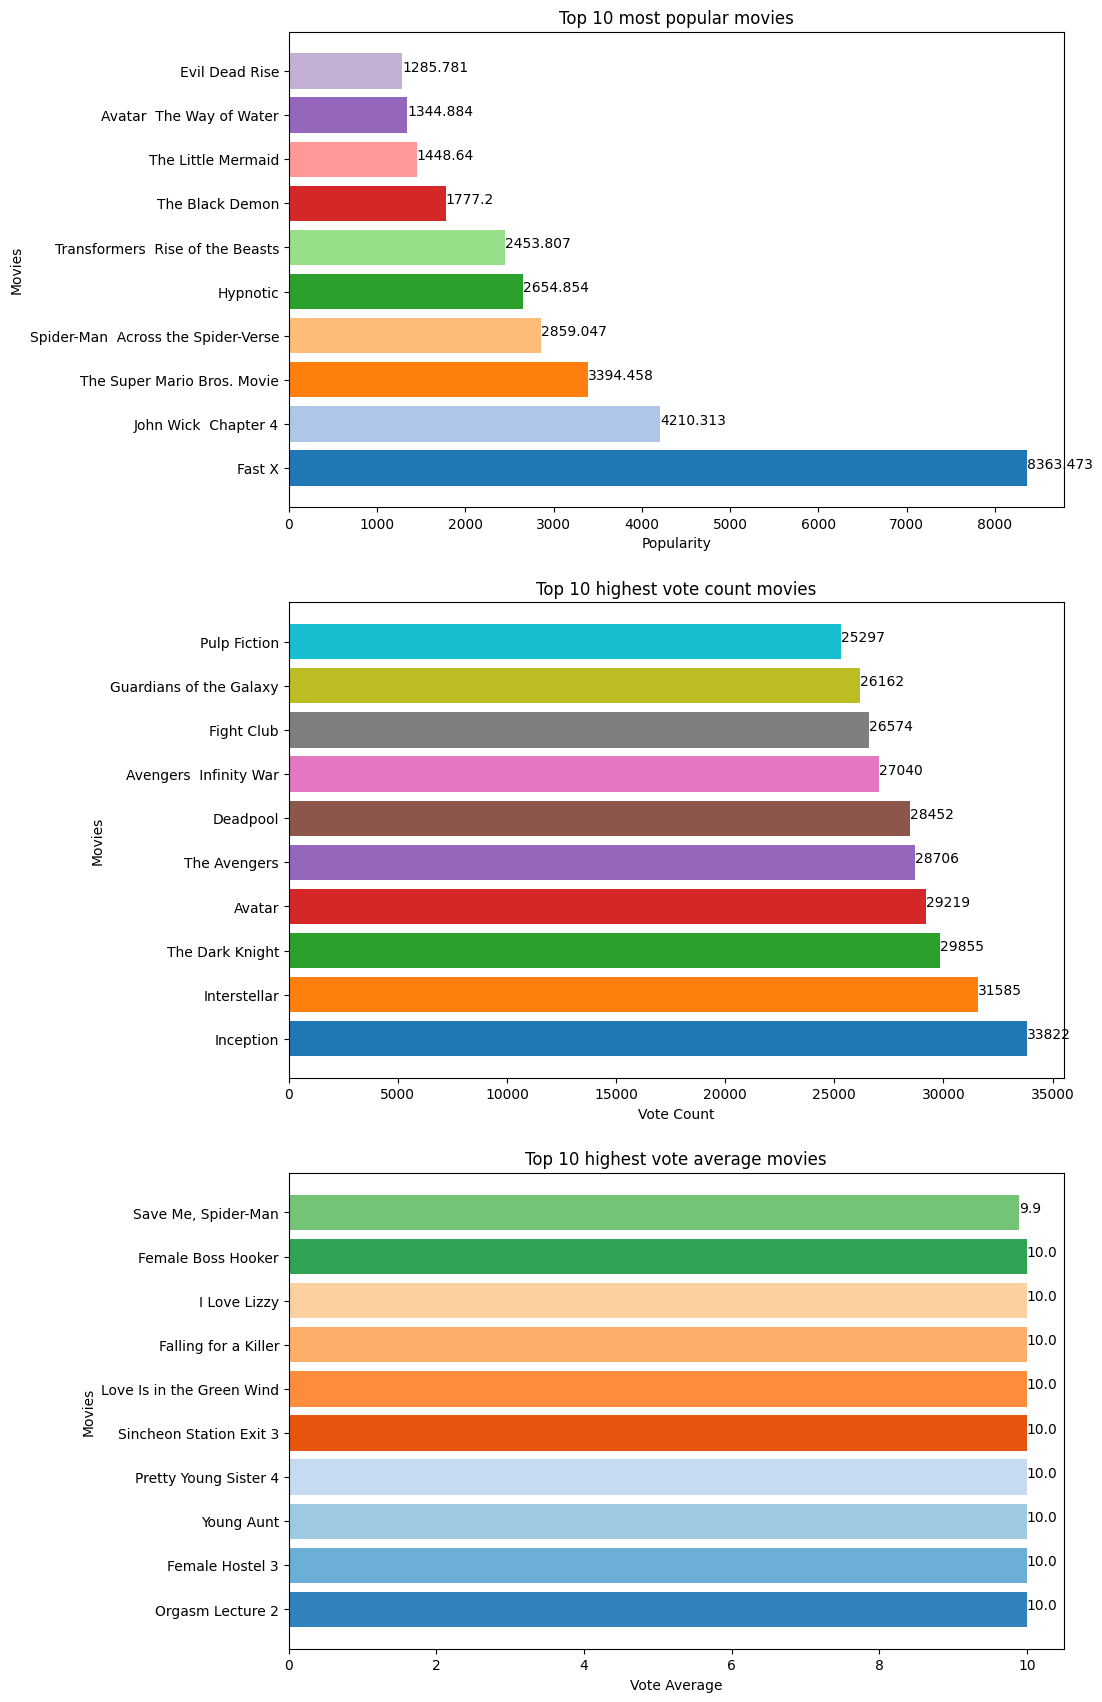

In [82]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()

In [83]:
df['original_language'].value_counts()

,count
original_language,
English,7148
Japanese,639
Korean,340
French,323
Spanish,267
Italian,148
cn,147
Chinese,141
German,86


🔝 Top 10 des genres les plus populaires :
genres
Drama        3895
Comedy       2932
Action       2713
Thriller     2570
Adventure    1891
Romance      1651
Horror       1461
Animation    1347
Family       1333
Fantasy      1300
Name: count, dtype: int64


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

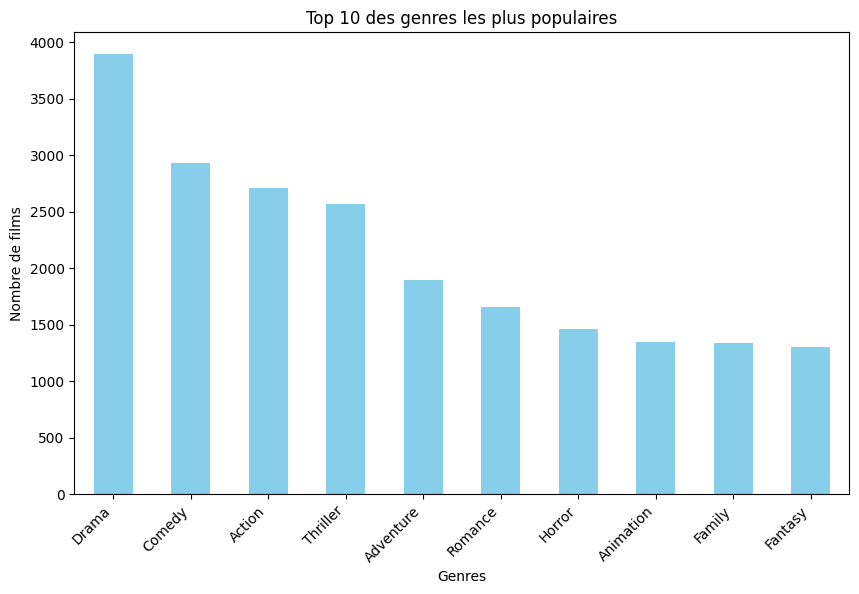

In [90]:
import pandas as pd

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"

# Lire le fichier CSV
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Diviser les genres par ',' et les "exploser" pour avoir chaque genre dans une ligne séparée
genres_series = df['genres'].str.split(',').explode().str.strip()

# Compter la fréquence de chaque genre
genre_counts = genres_series.value_counts()

# Afficher le top 10 des genres les plus populaires
top_10_genres = genre_counts.head(10)

print("🔝 Top 10 des genres les plus populaires :")
print(top_10_genres)


# Création du graphique à barres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Top 10 des genres les plus populaires')
plt.xlabel('Genres')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour les rendre lisibles

# Afficher le graphique
plt.tight_layout

In [91]:
import pandas as pd

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Diviser les genres par ',' et les "exploser" pour avoir chaque genre dans une ligne séparée
df['genres'] = df['genres'].str.split(',')

# Fonction pour obtenir les 5 films les plus populaires pour chaque genre
def top_5_by_genre(genre):
    # Filtrer les films de ce genre
    genre_df = df[df['genres'].apply(lambda genres: genre in genres)]

    # Trier les films par popularité (ou un autre critère comme 'vote_average' ou 'revenue') et sélectionner les 5 premiers
    genre_top_5 = genre_df.sort_values(by='popularity', ascending=False).head(5)

    # Afficher les résultats
    return genre_top_5[['title', 'popularity']]

# Lister tous les genres uniques
all_genres = df['genres'].explode().unique()

# Créer un dictionnaire pour stocker les top 5 films de chaque genre
top_5_movies_by_genre = {}

# Obtenir les top 5 pour chaque genre
for genre in all_genres:
    top_5_movies_by_genre[genre] = top_5_by_genre(genre)

# Afficher les top 5 de chaque genre
for genre, top_5 in top_5_movies_by_genre.items():
    print(f"Top 5 films pour le genre '{genre}':")
    print(top_5[['title', 'popularity']])
    print("\n")


Top 5 films pour le genre ' Action':
                                  title  popularity
0                                Fast X    8363.473
1                  John Wick  Chapter 4    4210.313
3   Spider-Man  Across the Spider-Verse    2859.047
5      Transformers  Rise of the Beasts    2453.807
10                    Operation Seawolf    1269.136


Top 5 films pour le genre ' Crime':
                 title  popularity
0               Fast X    8363.473
21   To Catch a Killer     920.656
33                Snag     621.873
88         Mafia Mamma     235.858
125         The Batman     183.459


Top 5 films pour le genre ' Thriller ':
                         title  popularity
0                       Fast X    8363.473
6              The Black Demon    1777.200
16         The Pope s Exorcist    1037.514
22  Guy Ritchie s The Covenant     917.907
31                  The Mother     660.471


Top 5 films pour le genre ' Thriller':
                   title  popularity
1   John Wick  Chapter 4 

Top 5 films les plus rentables pour le genre ' Action':
                             title        profit       revenue       budget
82                          Avatar  2.686706e+09  2.923706e+09  237000000.0
1009  Star Wars  The Force Awakens  1.823224e+09  2.068224e+09  245000000.0
129         Avengers  Infinity War  1.752415e+09  2.052415e+09  300000000.0
46         Spider-Man  No Way Home  1.721847e+09  1.921847e+09  200000000.0
545                 Jurassic World  1.521537e+09  1.671537e+09  150000000.0


Top 5 films les plus rentables pour le genre ' Crime':
                       title        profit       revenue       budget
656                    Joker  1.019458e+09  1.074458e+09   55000000.0
204  The Fate of the Furious  9.860051e+08  1.236005e+09  250000000.0
771    The Dark Knight Rises  8.310413e+08  1.081041e+09  250000000.0
430          The Dark Knight  8.195584e+08  1.004558e+09  185000000.0
125               The Batman  5.859456e+08  7.709456e+08  185000000.0


Top 5 fil

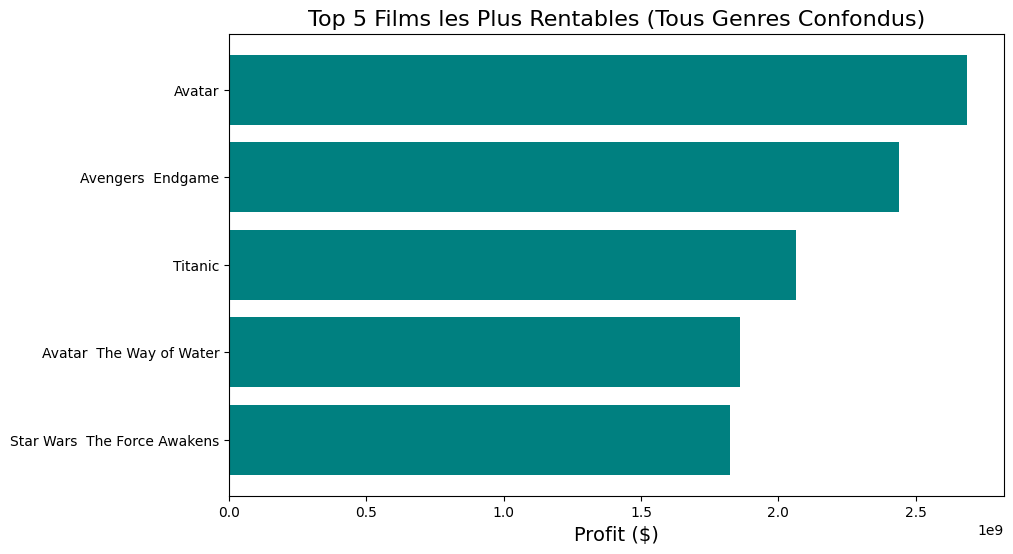

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Calculer la rentabilité de chaque film (revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Diviser les genres par ',' et les "exploser" pour avoir chaque genre dans une ligne séparée
df['genres'] = df['genres'].str.split(',')

# Fonction pour obtenir les 5 films les plus rentables pour chaque genre
def top_5_profitable_by_genre(genre):
    # Filtrer les films de ce genre
    genre_df = df[df['genres'].apply(lambda genres: genre in genres)]

    # Trier les films par rentabilité et sélectionner les 5 premiers
    genre_top_5 = genre_df.sort_values(by='profit', ascending=False).head(5)

    # Afficher les résultats
    return genre_top_5[['title', 'profit', 'revenue', 'budget']]

# Lister tous les genres uniques
all_genres = df['genres'].explode().unique()

# Créer un dictionnaire pour stocker les films les plus rentables de chaque genre
top_5_profitable_movies_by_genre = {}

# Obtenir les top 5 rentables pour chaque genre
for genre in all_genres:
    top_5_profitable_movies_by_genre[genre] = top_5_profitable_by_genre(genre)

# Afficher les 5 films les plus rentables de chaque genre
for genre, top_5 in top_5_profitable_movies_by_genre.items():
    print(f"Top 5 films les plus rentables pour le genre '{genre}':")
    print(top_5[['title', 'profit', 'revenue', 'budget']])
    print("\n")

# 🌍 Top 5 films les plus rentables, tous genres confondus
top_5_profitable_global = df.sort_values(by='profit', ascending=False).head(5)

# Affichage des résultats globaux
print("Top 5 films les plus rentables tous genres confondus :")
print(top_5_profitable_global[['title', 'profit', 'revenue', 'budget']])

# 🧑‍🎨 Création du graphique pour les films les plus rentables
plt.figure(figsize=(10, 6))
plt.barh(top_5_profitable_global['title'], top_5_profitable_global['profit'], color='teal')
plt.xlabel('Profit ($)', fontsize=14)
plt.title('Top 5 Films les Plus Rentables (Tous Genres Confondus)', fontsize=16)
plt.gca().invert_yaxis()  # Inverser l'axe Y pour avoir le film le plus rentable en haut
plt.show()


In [96]:
import pandas as pd

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Séparer les sociétés de production (car certaines peuvent être multiples par film)
df['production_companies'] = df['production_companies'].str.split(',')

# Exploser la liste des sociétés de production pour que chaque société ait sa propre ligne
df_exploded = df.explode('production_companies')

# Compter le nombre de films par société de production
production_counts = df_exploded['production_companies'].value_counts()

# Sélectionner les 5 sociétés de production avec le plus grand nombre de films
top_5_production_companies = production_counts.head(5)

# Afficher les résultats
print("Top 5 des sociétés de production avec le plus grand nombre de films :")
print(top_5_production_companies)


Top 5 des sociétés de production avec le plus grand nombre de films :
production_companies
                          518
Universal Pictures        327
Warner Bros. Pictures     305
Paramount                 260
20th Century Fox          248
Name: count, dtype: int64


In [97]:
import pandas as pd

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Convertir la colonne 'release_date' en datetime et extraire l'année
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')
df['release_year'] = df['release_date'].dt.year

# Créer des tranches de 5 ans (ex. 2010-2014, 2015-2019, etc.)
df['year_group'] = (df['release_year'] // 5) * 5

# Trouver le film le plus populaire dans chaque groupe de 5 ans
most_popular_movies = df.loc[df.groupby('year_group')['popularity'].idxmax()]

# Afficher les résultats
print("Le film le plus populaire pour chaque période de 5 ans :")
print(most_popular_movies[['year_group', 'title', 'popularity']])


Le film le plus populaire pour chaque période de 5 ans :
      year_group                              title  popularity
6149      1900.0                 A Trip to the Moon      16.462
9967      1915.0              The Birth of a Nation      12.324
4136      1920.0                           Cytherea      20.685
2325      1925.0   The Transformation of Dr. Bessel      29.303
381       1930.0                          Baby Face      89.292
591       1935.0    Snow White and the Seven Dwarfs      67.737
1060      1940.0                              Bambi      47.829
2554      1945.0              It s a Wonderful Life      27.584
497       1950.0                         Cinderella      75.643
1374      1955.0                 Lady and the Tramp      40.061
1286      1960.0                             Psycho      41.707
886       1965.0                    The Jungle Book      53.030
282       1970.0                      The Godfather     110.377
289       1975.0                       To Be Tw

In [98]:
df['year'] = df['release_date'].dt.year
avg_pop = df.groupby('year')['popularity'].mean()

<Figure size 1200x800 with 0 Axes>

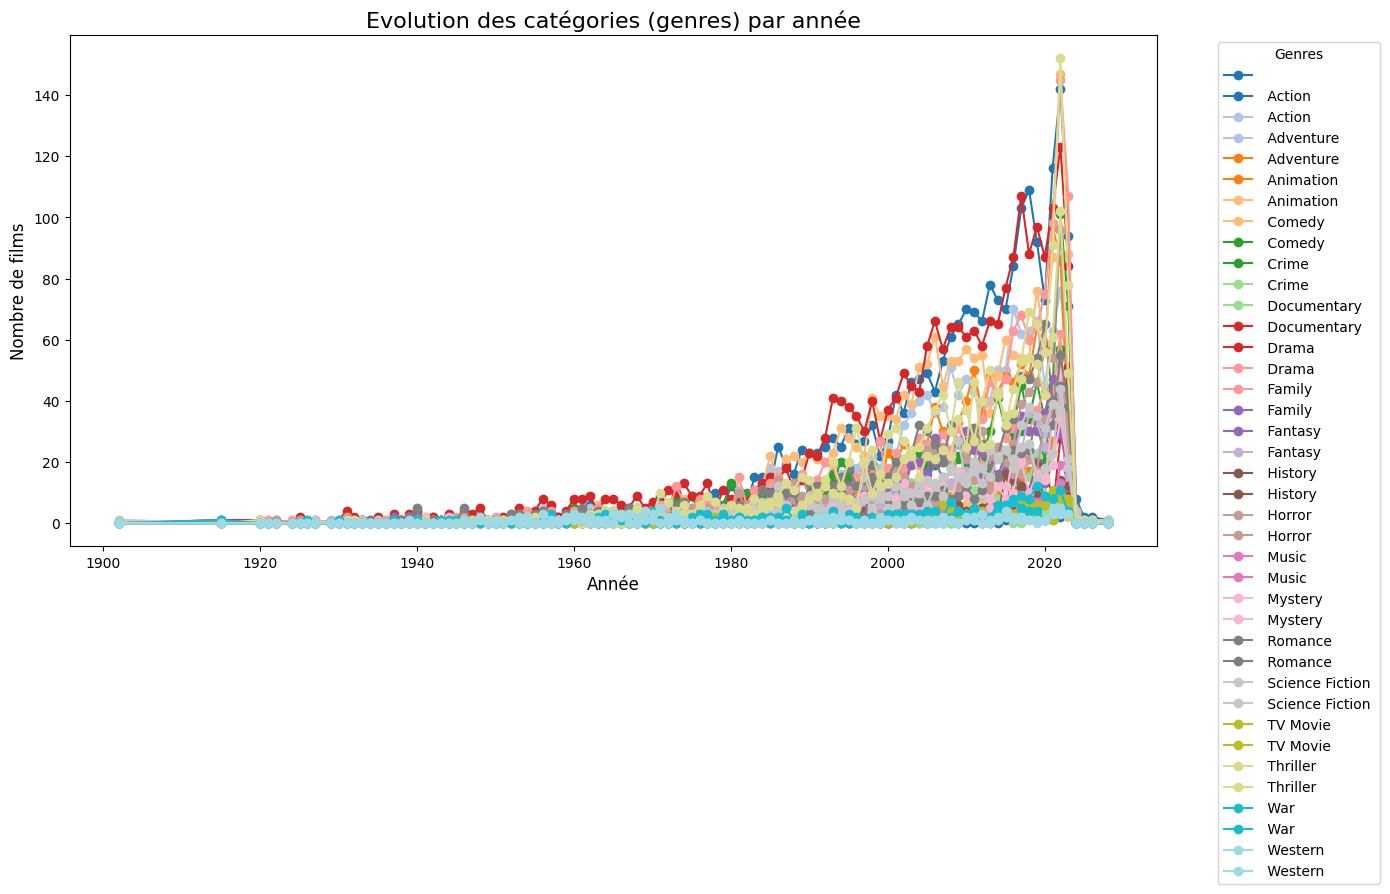

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Convertir la colonne 'release_date' en datetime et extraire l'année
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')
df['release_year'] = df['release_date'].dt.year

# Séparer les genres et les exploser en lignes individuelles
df['genres'] = df['genres'].str.split(',')
df_exploded = df.explode('genres')

# Compter le nombre de films par genre pour chaque année
genre_year_count = df_exploded.groupby(['release_year', 'genres']).size().unstack(fill_value=0)

# Tracer la visualisation
plt.figure(figsize=(12, 8))
genre_year_count.plot(kind='line', marker='o', figsize=(14, 8), colormap='tab20')

# Ajouter les labels et le titre
plt.title('Evolution des catégories (genres) par année', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de films', fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Afficher le graphique
plt.tight_layout()
plt.show()


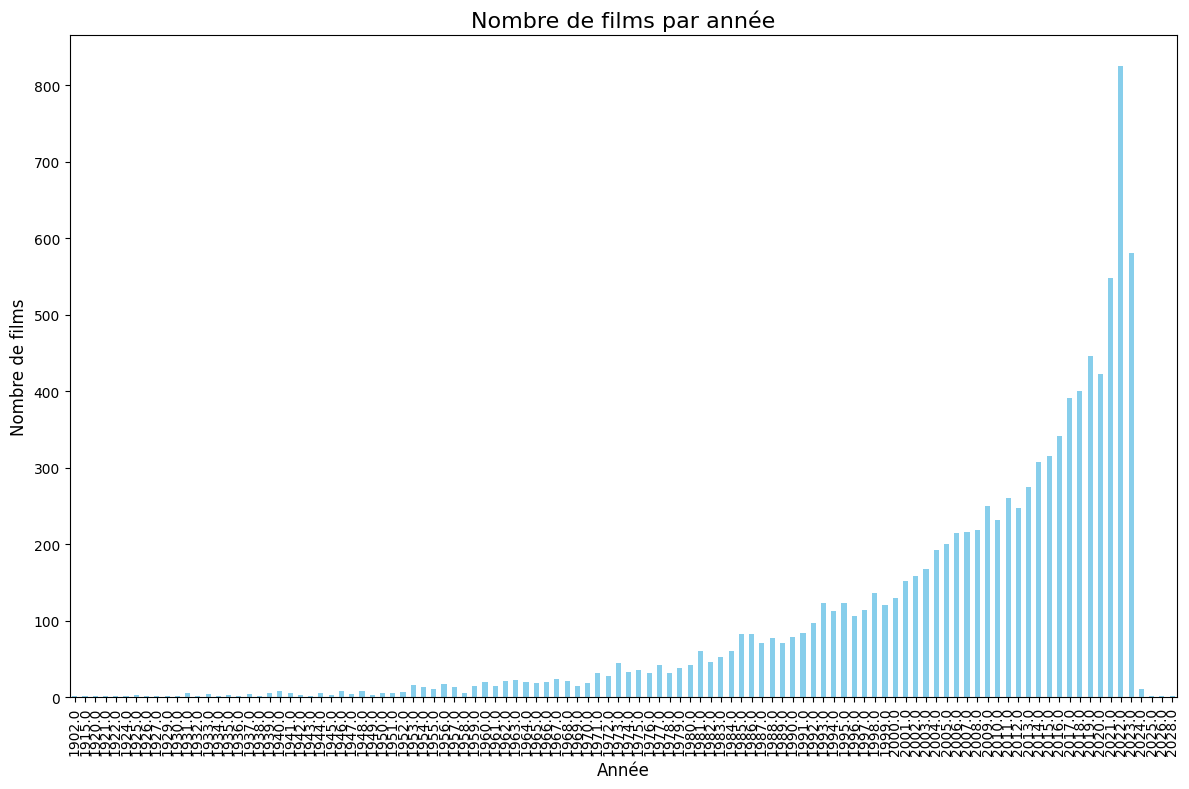

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Convertir la colonne 'release_date' en datetime et extraire l'année
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')
df['release_year'] = df['release_date'].dt.year

# Compter le nombre de films par année
movie_count_by_year = df['release_year'].value_counts().sort_index()

# Tracer la visualisation
plt.figure(figsize=(12, 8))
movie_count_by_year.plot(kind='bar', color='skyblue')

# Ajouter les labels et le titre
plt.title('Nombre de films par année', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de films', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

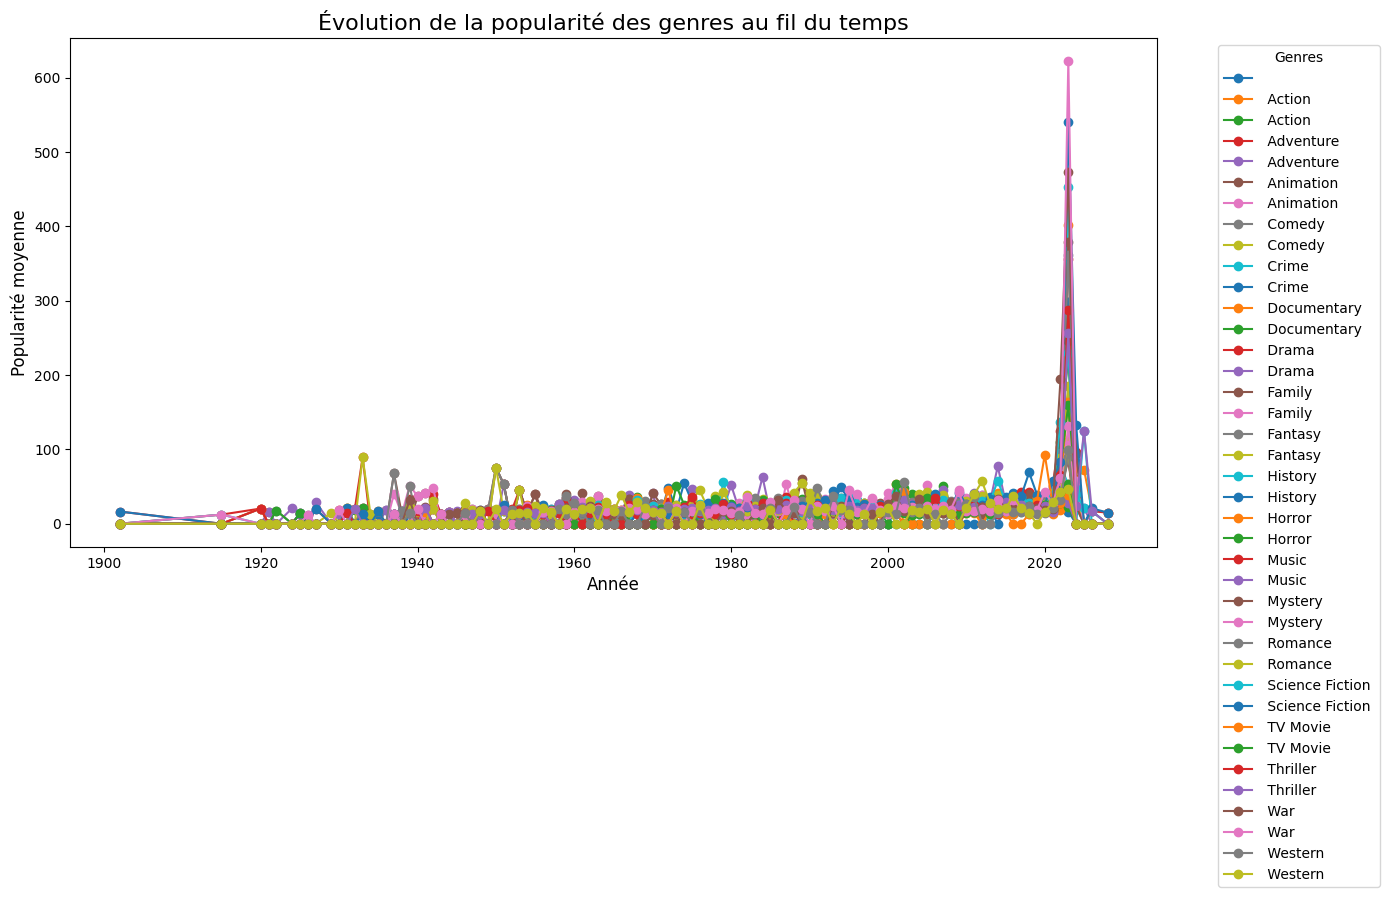

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Convertir la colonne 'release_date' en datetime et extraire l'année
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')
df['release_year'] = df['release_date'].dt.year

# Séparer les genres et les exploser en lignes individuelles
df['genres'] = df['genres'].str.split(',')
df_exploded = df.explode('genres')

# Calculer la popularité moyenne par genre et par année
popularity_by_genre_year = df_exploded.groupby(['release_year', 'genres'])['popularity'].mean().unstack(fill_value=0)

# Tracer la visualisation
plt.figure(figsize=(14, 8))
popularity_by_genre_year.plot(kind='line', marker='o', figsize=(14, 8))

# Ajouter les labels et le titre
plt.title('Évolution de la popularité des genres au fil du temps', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Popularité moyenne', fontsize=12)

# Afficher la légende et le graphique
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


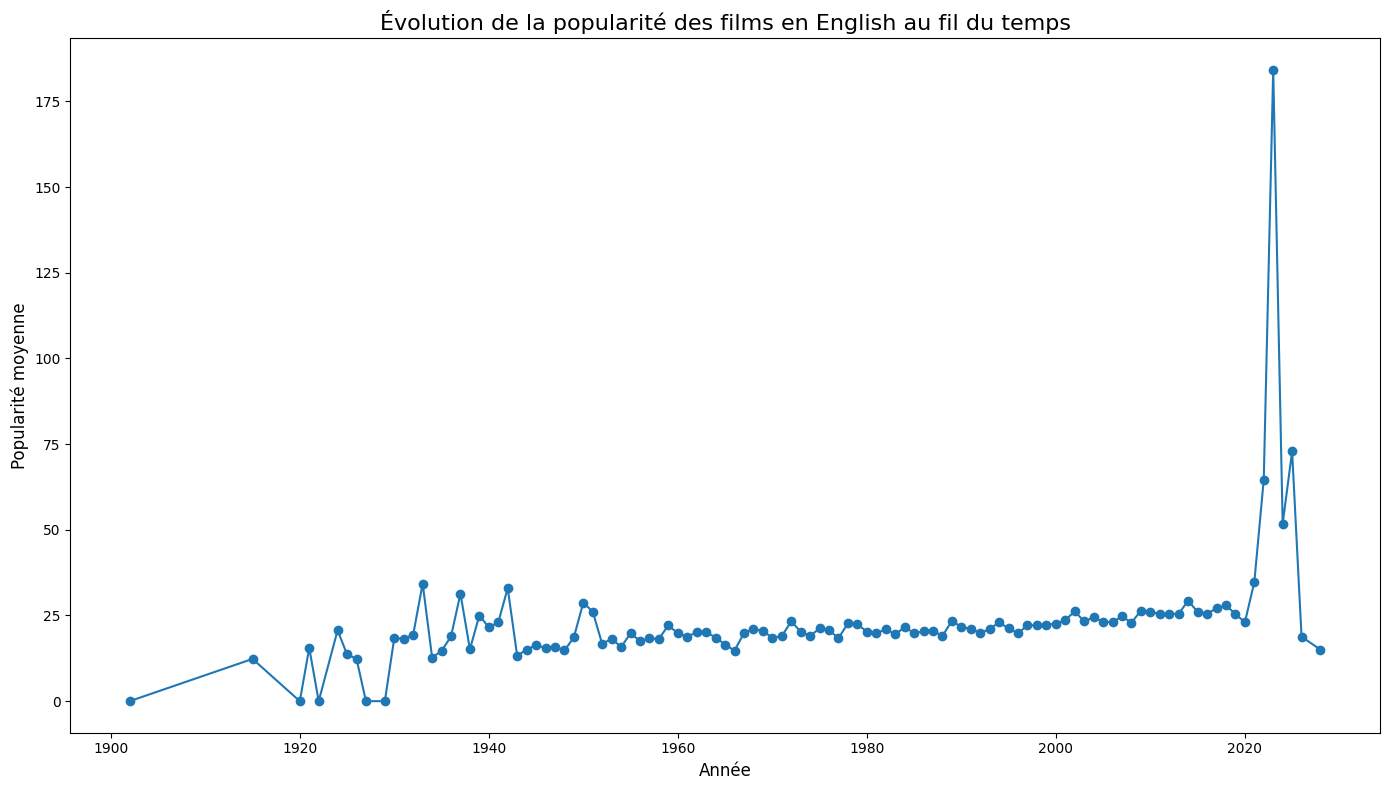

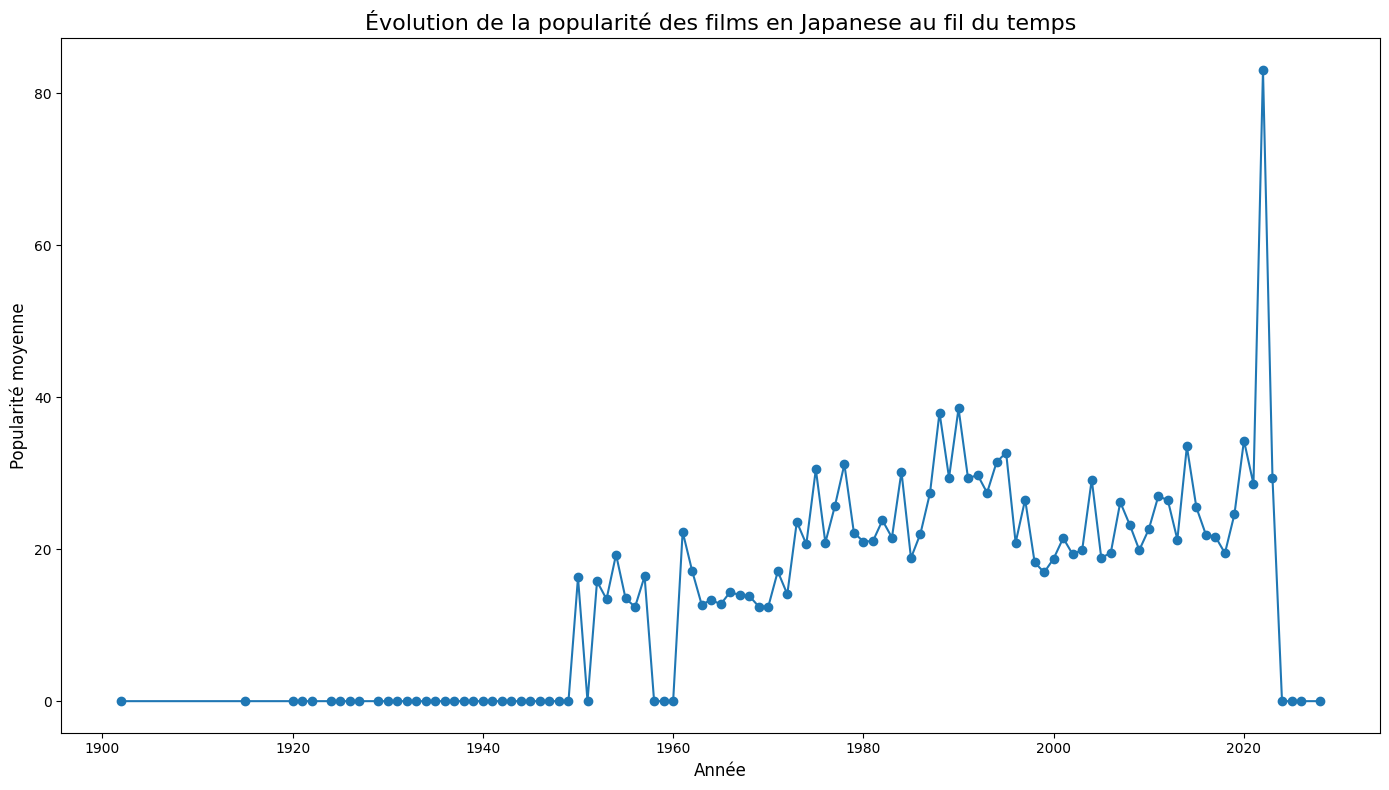

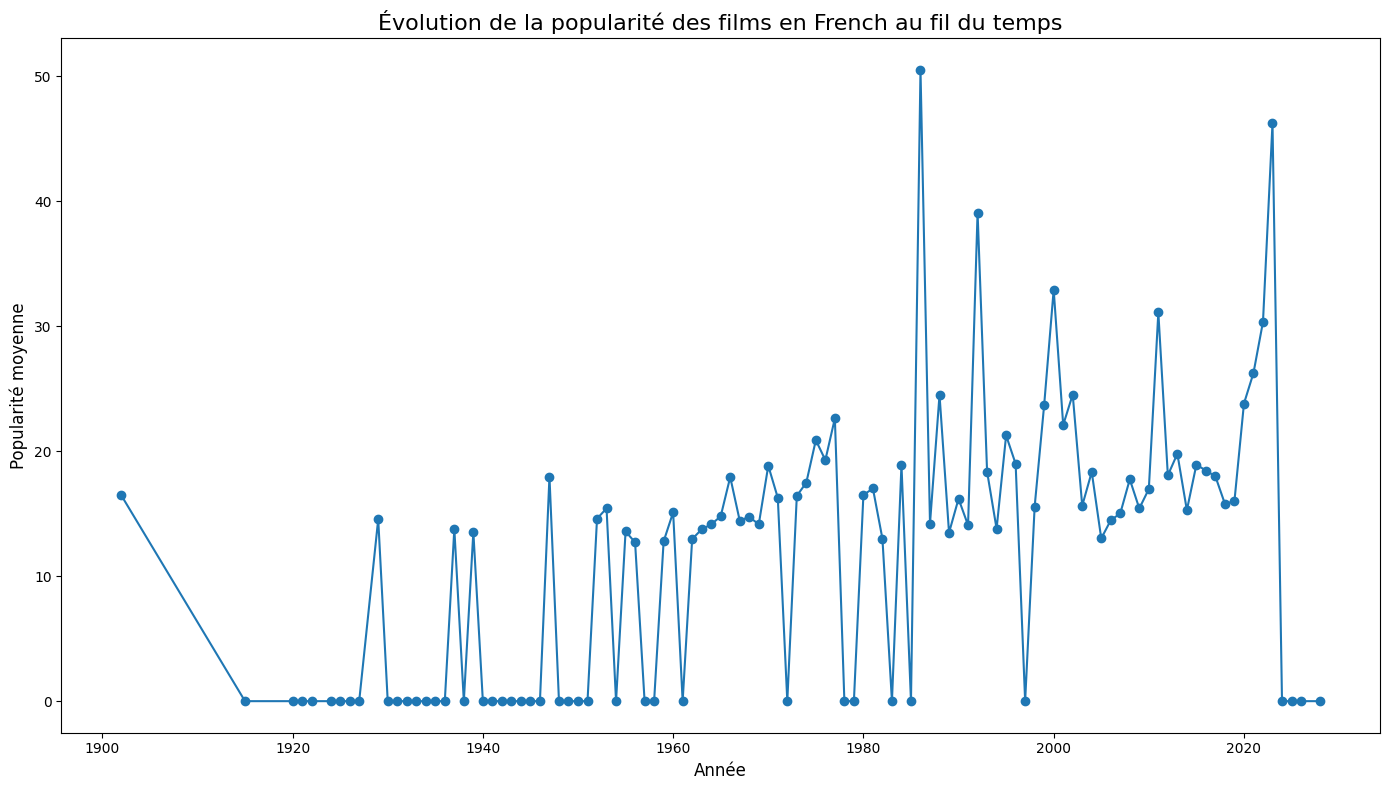

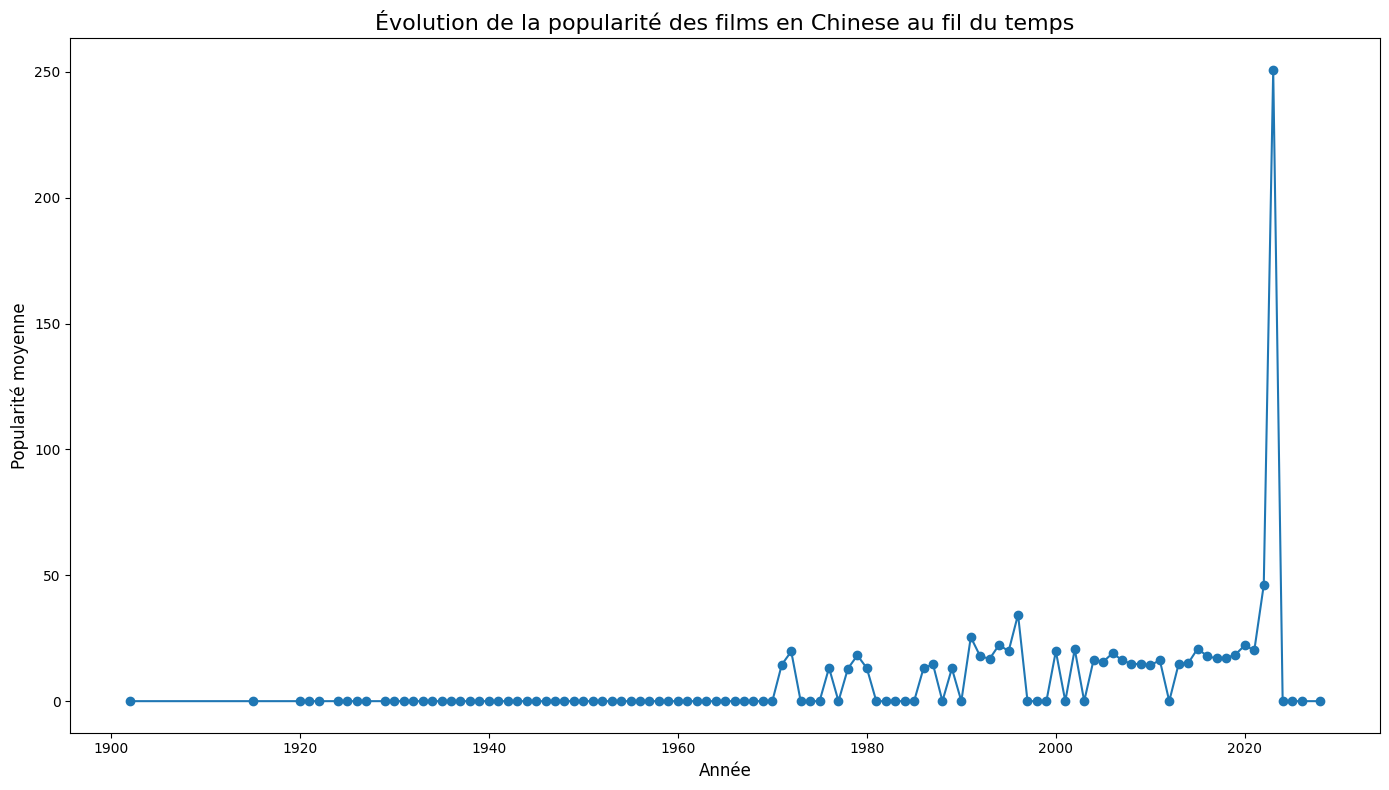

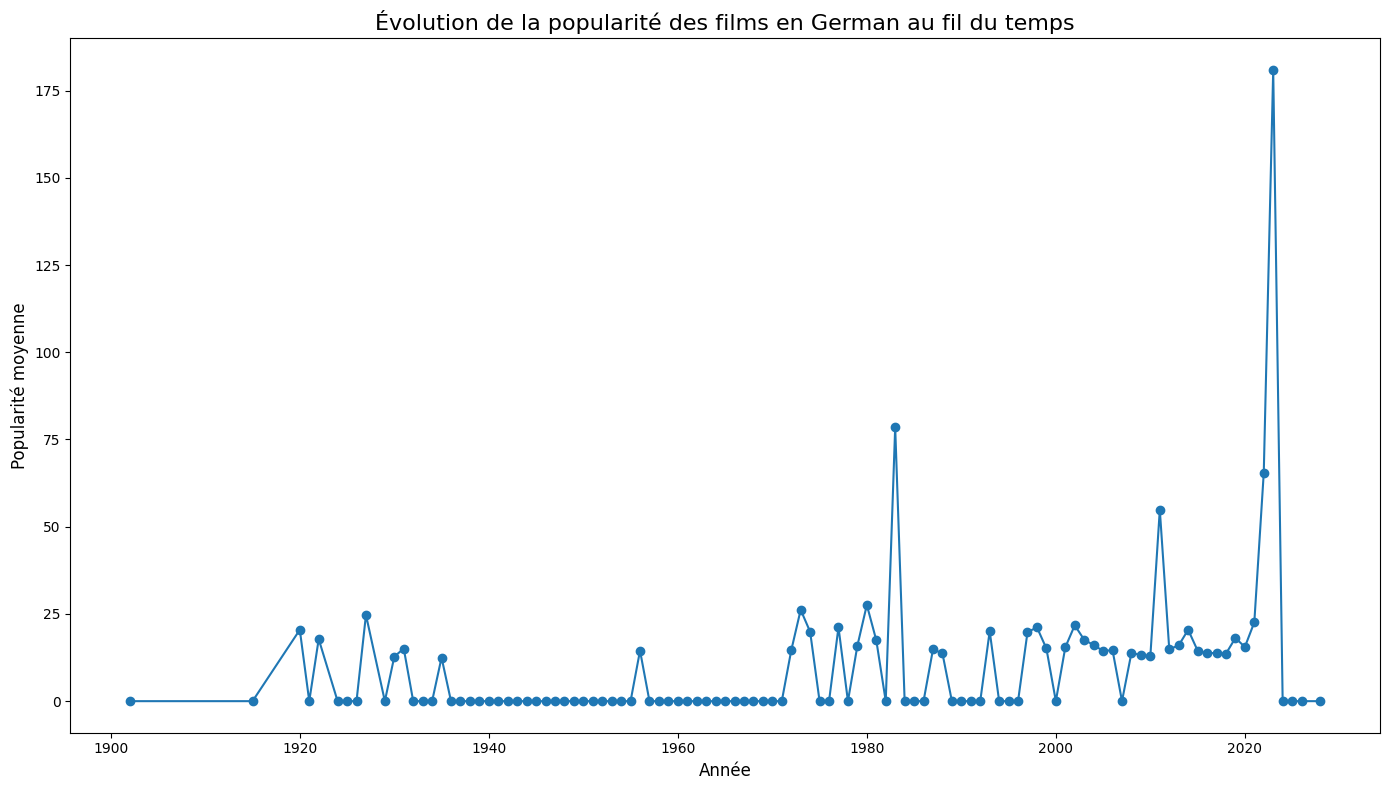

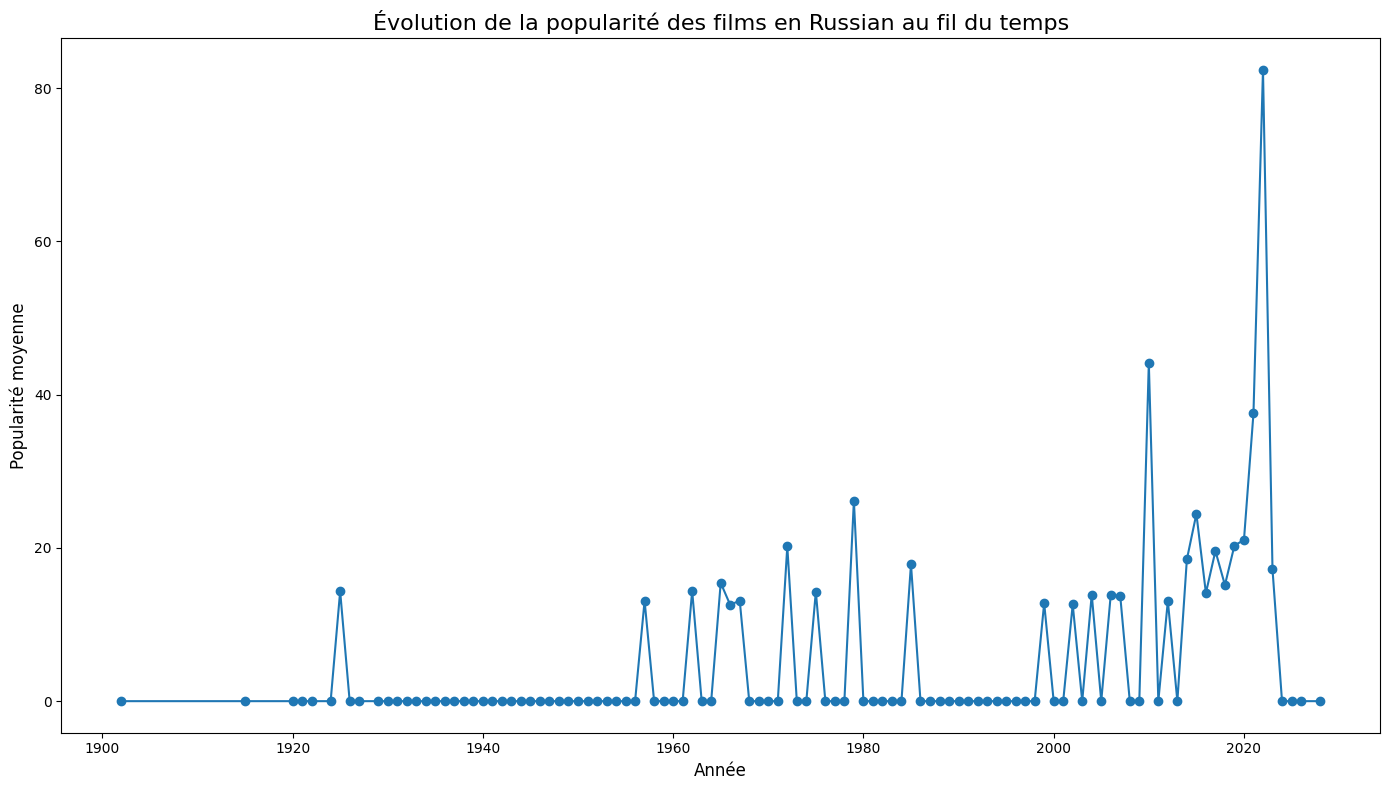

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Convertir la colonne 'release_date' en datetime et extraire l'année
df['release_date'] = pd.to_datetime(df['release_date'], format='%d/%m/%Y')
df['release_year'] = df['release_date'].dt.year

# Filtrer les langues d'intérêt
languages_of_interest = ['English', 'Japanese', 'French', 'Chinese', 'German', 'Russian']
df_filtered = df[df['original_language'].isin(languages_of_interest)]

# Calculer la popularité moyenne par langue et par année
popularity_by_language_year = df_filtered.groupby(['release_year', 'original_language'])['popularity'].mean().unstack(fill_value=0)

# Tracer un graphique pour chaque langue
for language in languages_of_interest:
    plt.figure(figsize=(14, 8))
    popularity_by_language_year[language].plot(kind='line', marker='o', figsize=(14, 8))

    # Ajouter les labels et le titre
    plt.title(f'Évolution de la popularité des films en {language} au fil du temps', fontsize=16)
    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Popularité moyenne', fontsize=12)

    # Afficher la légende et le graphique
    plt.tight_layout()
    plt.show()


⏱️ Durée moyenne des films : 100.81 minutes


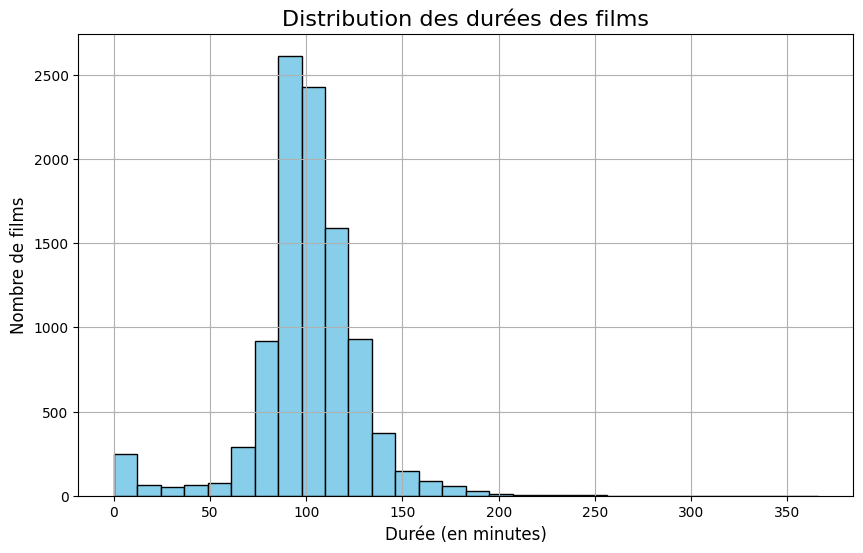

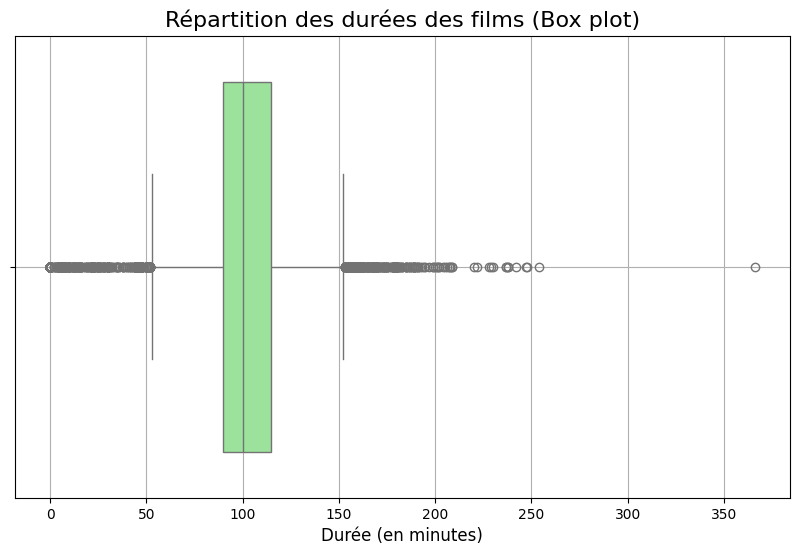

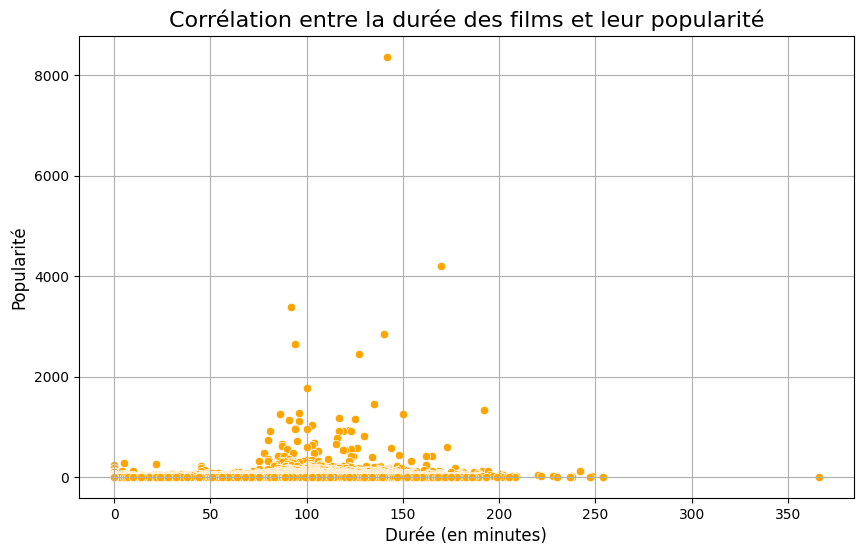

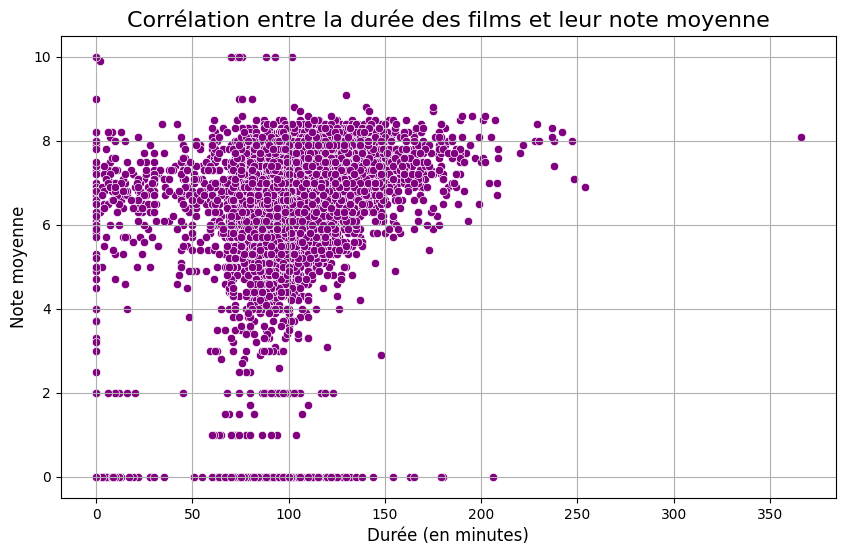

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# 🔍 1. Calcul de la durée moyenne des films
average_runtime = df['runtime'].mean()
print(f"⏱️ Durée moyenne des films : {average_runtime:.2f} minutes")

# 🔍 2. Distribution de la durée des films (histogramme)
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution des durées des films', fontsize=16)
plt.xlabel('Durée (en minutes)', fontsize=12)
plt.ylabel('Nombre de films', fontsize=12)
plt.grid(True)
plt.show()

# 🔍 3. Box plot de la durée des films
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['runtime'].dropna(), color='lightgreen')
plt.title('Répartition des durées des films (Box plot)', fontsize=16)
plt.xlabel('Durée (en minutes)', fontsize=12)
plt.grid(True)
plt.show()

# 🔍 4. Corrélation entre la durée et la popularité
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['runtime'], y=df['popularity'], color='orange')
plt.title('Corrélation entre la durée des films et leur popularité', fontsize=16)
plt.xlabel('Durée (en minutes)', fontsize=12)
plt.ylabel('Popularité', fontsize=12)
plt.grid(True)
plt.show()

# 🔍 5. Corrélation entre la durée et la note moyenne
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['runtime'], y=df['vote_average'], color='purple')
plt.title('Corrélation entre la durée des films et leur note moyenne', fontsize=16)
plt.xlabel('Durée (en minutes)', fontsize=12)
plt.ylabel('Note moyenne', fontsize=12)
plt.grid(True)
plt.show()


🔍 Matrice de corrélation entre les variables :
                 budget  vote_count   runtime  popularity  vote_average
budget        1.000000    0.598737  0.289752    0.167312      0.081663
vote_count    0.598737    1.000000  0.286397    0.065178      0.253136
runtime       0.289752    0.286397  1.000000    0.043753      0.399382
popularity    0.167312    0.065178  0.043753    1.000000      0.036122
vote_average  0.081663    0.253136  0.399382    0.036122      1.000000


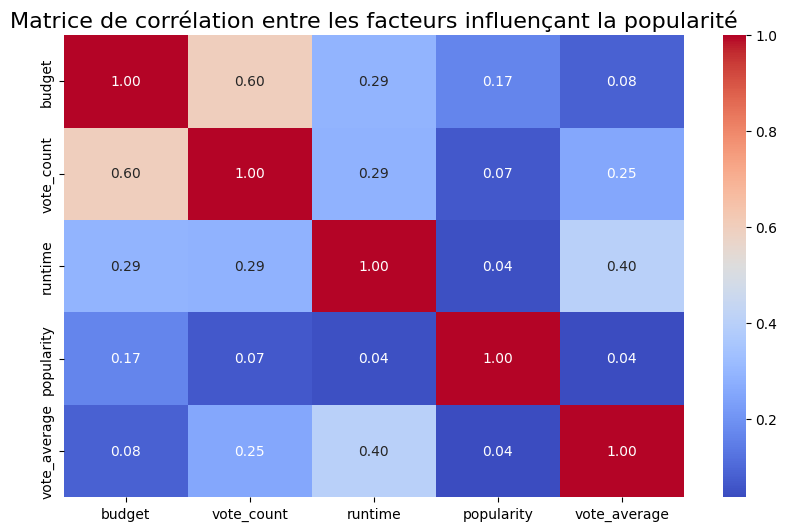

🔍 Matrice de corrélation entre les variables et la note :
                 budget  vote_count   runtime  popularity  vote_average
budget        1.000000    0.598737  0.289752    0.167312      0.081663
vote_count    0.598737    1.000000  0.286397    0.065178      0.253136
runtime       0.289752    0.286397  1.000000    0.043753      0.399382
popularity    0.167312    0.065178  0.043753    1.000000      0.036122
vote_average  0.081663    0.253136  0.399382    0.036122      1.000000


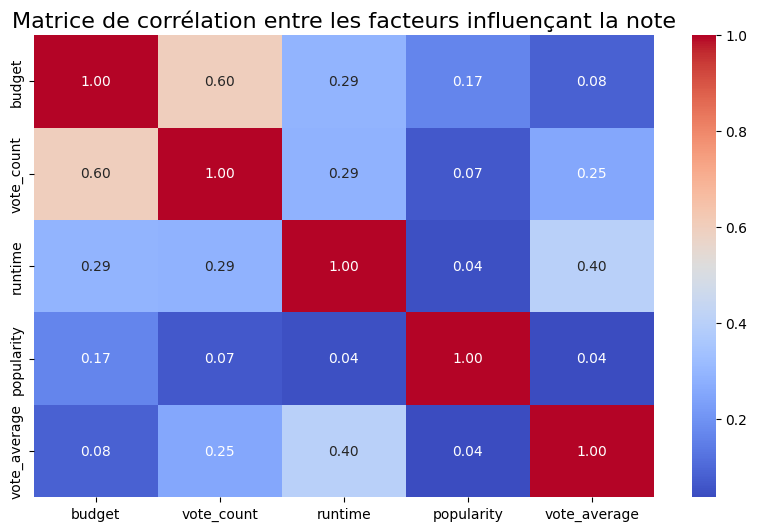

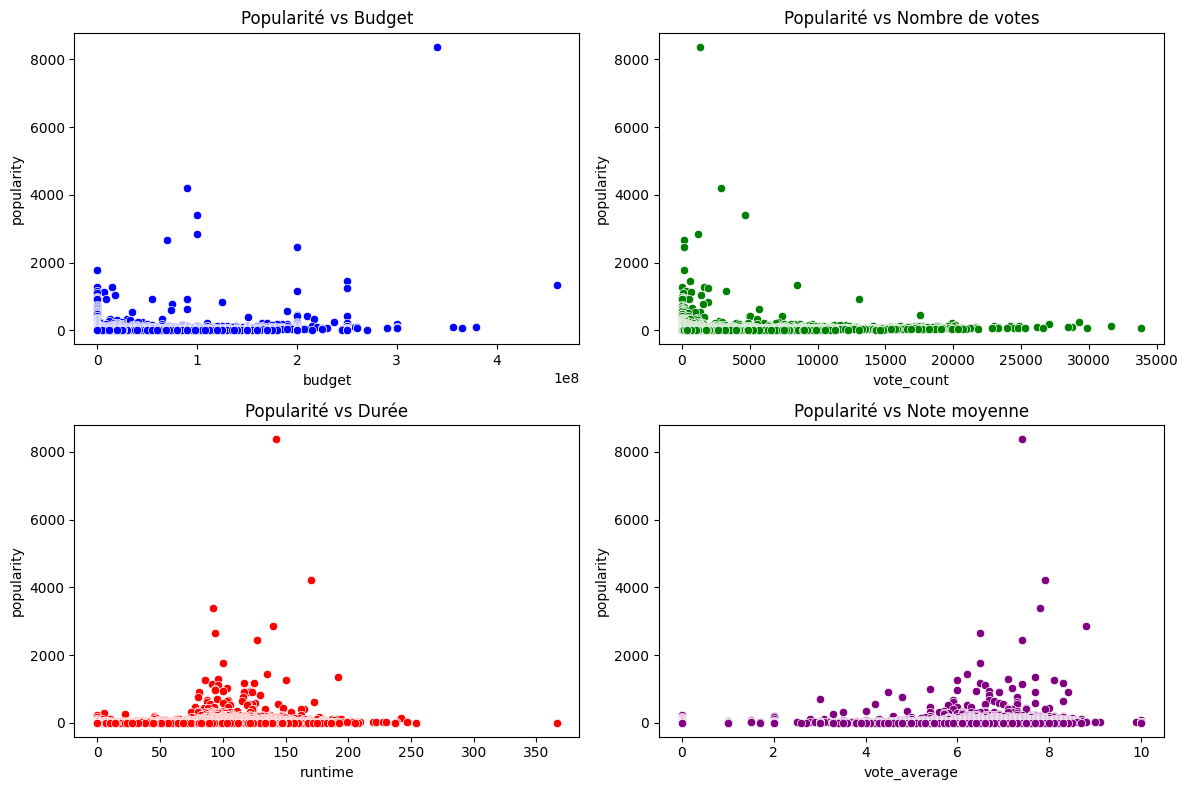

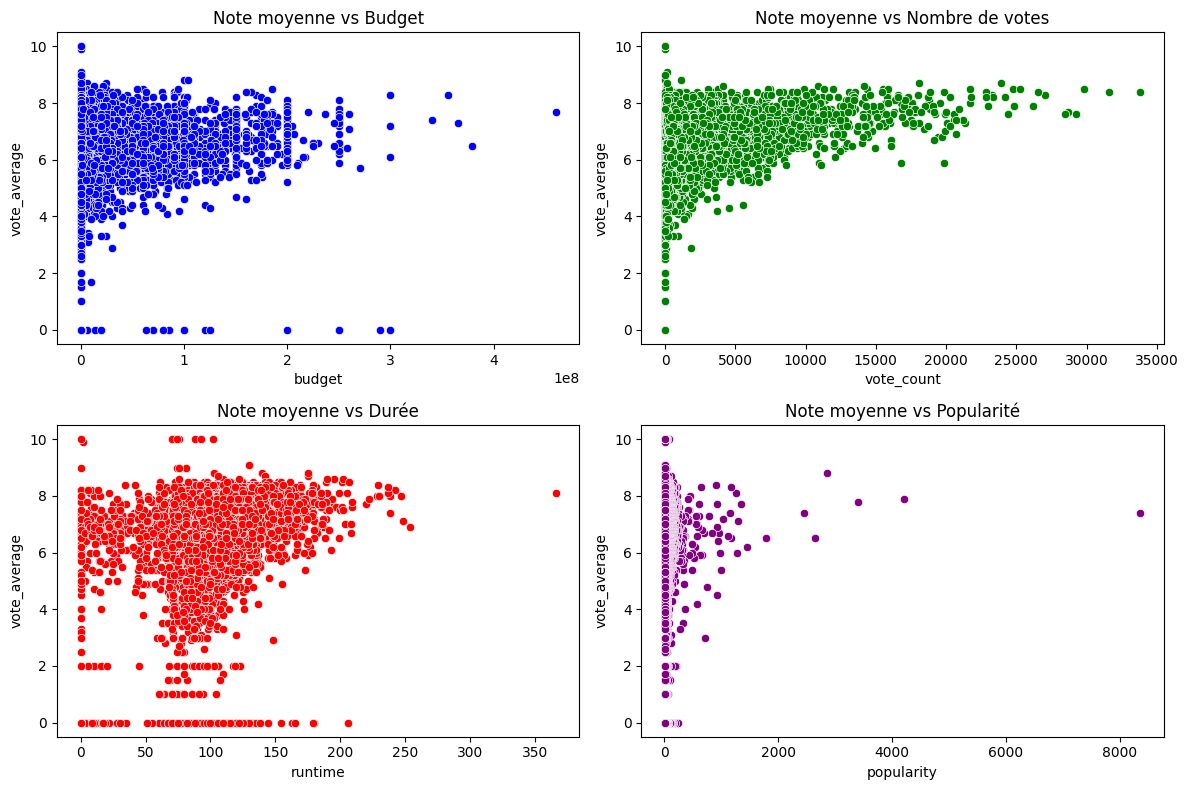

🔍 Films avec un budget faible mais une popularité élevée :
                             title      budget  popularity
6                  The Black Demon         0.0    1777.200
9                   Evil Dead Rise  15000000.0    1285.781
10               Operation Seawolf     15000.0    1269.136
12                        My Fault         0.0    1170.670
14                            Sisu   6200000.0    1146.052
15  Accident Man  Hitman s Holiday         0.0    1117.559
16             The Pope s Exorcist  18000000.0    1037.514
17            The Three Musketeers         0.0     988.223
18                    Mother s Day         0.0     969.714
19                    Blood & Gold         0.0     957.200


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# 🔍 1. Analyse de la corrélation entre la popularité et les autres facteurs
correlation_matrix = df[['budget', 'vote_count', 'runtime', 'popularity', 'vote_average']].corr()
print("🔍 Matrice de corrélation entre les variables :\n", correlation_matrix)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre les facteurs influençant la popularité", fontsize=16)
plt.show()

# 🔍 2. Analyse de la corrélation entre la note et les autres facteurs
rating_correlation = df[['budget', 'vote_count', 'runtime', 'popularity', 'vote_average']].corr()
print("🔍 Matrice de corrélation entre les variables et la note :\n", rating_correlation)

# Visualisation de la matrice de corrélation pour la note
plt.figure(figsize=(10, 6))
sns.heatmap(rating_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre les facteurs influençant la note", fontsize=16)
plt.show()

# 🔍 3. Visualisation de la relation entre les facteurs et la popularité
plt.figure(figsize=(12, 8))

# Popularité vs Budget
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['budget'], y=df['popularity'], color='blue')
plt.title('Popularité vs Budget')

# Popularité vs Nombre de votes
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['vote_count'], y=df['popularity'], color='green')
plt.title('Popularité vs Nombre de votes')

# Popularité vs Durée
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['runtime'], y=df['popularity'], color='red')
plt.title('Popularité vs Durée')

# Popularité vs Note moyenne
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['vote_average'], y=df['popularity'], color='purple')
plt.title('Popularité vs Note moyenne')

plt.tight_layout()
plt.show()

# 🔍 4. Visualisation de la relation entre les facteurs et la note
plt.figure(figsize=(12, 8))

# Note vs Budget
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['budget'], y=df['vote_average'], color='blue')
plt.title('Note moyenne vs Budget')

# Note vs Nombre de votes
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['vote_count'], y=df['vote_average'], color='green')
plt.title('Note moyenne vs Nombre de votes')

# Note vs Durée
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['runtime'], y=df['vote_average'], color='red')
plt.title('Note moyenne vs Durée')

# Note vs Popularité
plt.subplot(2, 2, 4)
sns.scatterplot(x=df['popularity'], y=df['vote_average'], color='purple')
plt.title('Note moyenne vs Popularité')

plt.tight_layout()
plt.show()

# 🔍 5. Analyse de tendances inattendues (par exemple, budget faible mais popularité élevée)
unexpected_trends = df[df['budget'] < 50000000]  # Par exemple, budget faible (<50 millions)
unexpected_trends = unexpected_trends.sort_values(by='popularity', ascending=False)

print("🔍 Films avec un budget faible mais une popularité élevée :")
print(unexpected_trends[['title', 'budget', 'popularity']].head(10))


Meilleurs paramètres :  {'fit_intercept': True}
Erreur quadratique moyenne (MSE) : 45307.706255481804
R² : 0.0011215682615858258


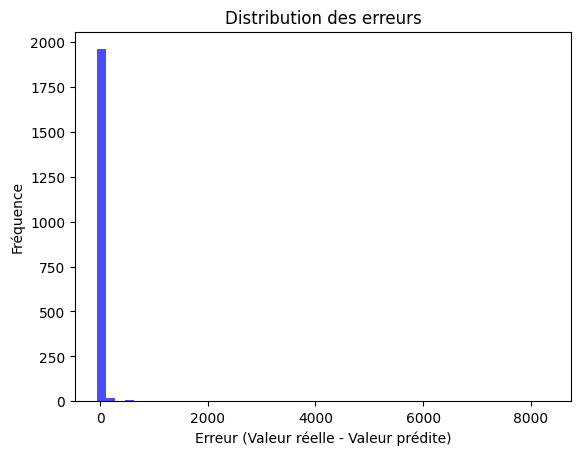

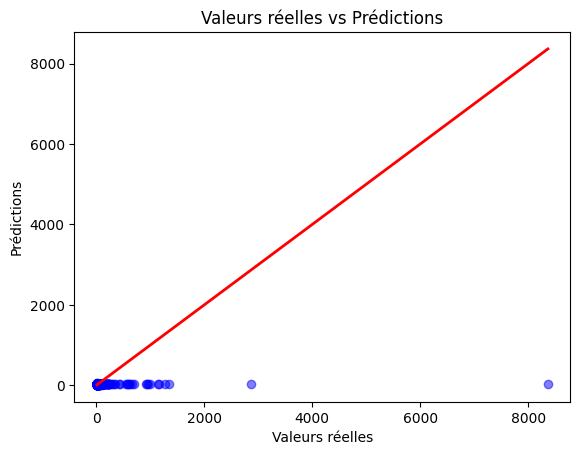

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# 1. Charger le fichier CSV
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# 2. Nettoyage et préparation des données
# Prendre le premier genre seulement et encoder les genres
df.loc[:, 'genres'] = df['genres'].apply(lambda x: x.split(',')[0])  # Prendre le premier genre
le = LabelEncoder()
df.loc[:, 'genres'] = le.fit_transform(df['genres'])  # Appliquer l'encodage

# Supprimer les colonnes non nécessaires (par exemple, les colonnes de texte)
df_cleaned = df[['genres', 'runtime', 'vote_average', 'popularity']].dropna()

# 3. Définir les variables indépendantes (X) et dépendantes (y)
X = df_cleaned[['genres', 'runtime', 'vote_average']]  # Les features
y = df_cleaned['popularity']  # La cible

# 4. Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Normaliser les données (standardisation) avant d'entraîner le modèle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialiser le modèle de régression linéaire
model = LinearRegression()

# 7. Optimisation du modèle avec GridSearchCV
params = {'fit_intercept': [True, False]}  # Le paramètre normalize est supprimé
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 8. Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)

# 9. Prédire les valeurs sur l'ensemble de test avec le modèle optimisé
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# 10. Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R² : {r2}")

# 11. Visualiser les erreurs
errors = y_test - y_pred

plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.title("Distribution des erreurs")
plt.xlabel("Erreur (Valeur réelle - Valeur prédite)")
plt.ylabel("Fréquence")
plt.show()

# 12. Visualisation des prédictions par rapport aux valeurs réelles
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Valeurs réelles vs Prédictions")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show()


1. Meilleurs paramètres : {'fit_intercept': True}
fit_intercept: Ce paramètre contrôle si l'ordonnée à l'origine (intercept) doit être calculée ou non dans le modèle de régression linéaire. Lorsque True, cela signifie que le modèle inclut une constante (intercept) dans l'équation de la droite de régression. Dans ce cas, le modèle a choisi de maintenir l'intercept, ce qui est souvent utile pour la régression linéaire standard.
2. Erreur quadratique moyenne (MSE) : 45307.71
MSE (Mean Squared Error) est une mesure de la différence entre les valeurs réelles et les valeurs prédites par le modèle. Une valeur faible indique que le modèle prédit bien, tandis qu'une valeur élevée suggère que les prédictions sont éloignées des valeurs réelles.
Ici, 45307.71 est relativement élevé, ce qui signifie que les prédictions du modèle ne sont pas très proches des valeurs réelles. Le modèle a probablement une mauvaise capacité à prédire la popularité des films sur la base des caractéristiques choisies (genre, durée et moyenne des notes).
3. R² : 0.0011
R² (Coefficient de détermination) mesure la proportion de la variance de la variable cible (ici, la popularité des films) qui est expliquée par le modèle. Un R² proche de 1 signifie que le modèle explique bien les données, tandis qu'un R² proche de 0 indique que le modèle n'explique pratiquement rien des données.
Ici, un R² de 0.0011 est très faible, ce qui signifie que le modèle explique à peine 0.11% de la variance de la popularité des films. Autrement dit, la régression linéaire sur les variables utilisées (genre, durée, et moyenne des notes) ne permet pas de prédire efficacement la popularité des films.

Conclusion :
Le modèle de régression linéaire utilisé avec ces paramètres n'explique pas bien la popularité des films. L'erreur quadratique moyenne est relativement élevée, et le R² est très faible. Cela suggère que la popularité des films pourrait être influencée par d'autres facteurs non pris en compte dans ce modèle (comme la distribution géographique, les campagnes marketing, la distribution des films, etc.). Il serait peut-être utile d'explorer d'autres modèles (comme des modèles non linéaires) ou d'ajouter davantage de variables explicatives pour améliorer les prédictions.

Colonnes disponibles dans le DataFrame:
Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'budget', 'production_companies', 'revenue',
       'runtime'],
      dtype='object')

Colonnes utilisées pour le clustering: ['budget', 'runtime', 'popularity', 'vote_count', 'vote_average']


<ipython-input-122-3714aedfdad7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


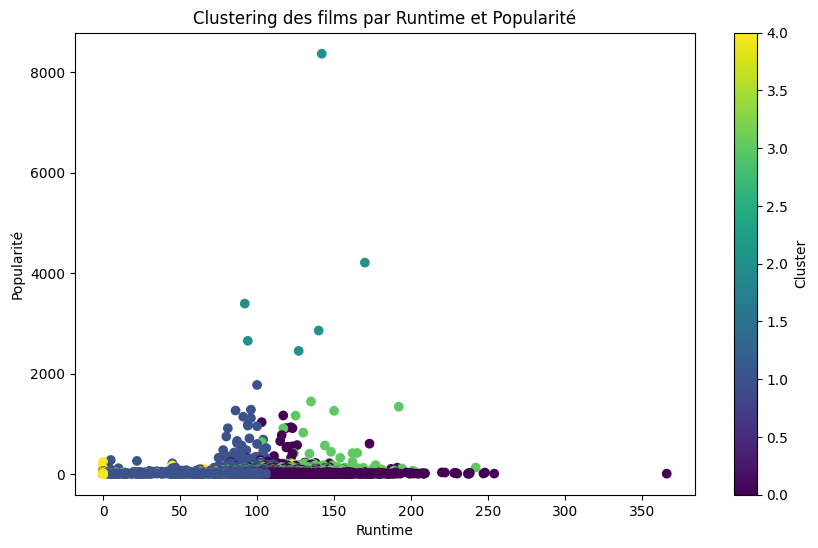


Quelques films par cluster:

Cluster 0:
                         title  runtime  popularity
12                    My Fault    117.0    1170.670
16         The Pope s Exorcist    103.0    1037.514
20        Project Wolf Hunting    122.0     937.849
21           To Catch a Killer    119.0     920.656
22  Guy Ritchie s The Covenant    123.0     917.907

Cluster 1:
                             title  runtime  popularity
6                  The Black Demon    100.0    1777.200
9                   Evil Dead Rise     96.0    1285.781
10               Operation Seawolf     86.0    1269.136
14                            Sisu     91.0    1146.052
15  Accident Man  Hitman s Holiday     96.0    1117.559

Cluster 2:
                                 title  runtime  popularity
0                               Fast X    142.0    8363.473
1                 John Wick  Chapter 4    170.0    4210.313
2          The Super Mario Bros. Movie     92.0    3394.458
3  Spider-Man  Across the Spider-Verse    140.0

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le fichier CSV (adapte le chemin si nécessaire)
file_path = "/content/test N°X 2.0.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

# Vérifier les colonnes disponibles dans le DataFrame
print("Colonnes disponibles dans le DataFrame:")
print(df.columns)

# Vérifier les colonnes nécessaires (ajuster selon les colonnes présentes dans ton dataset)
required_columns = ['budget', 'runtime', 'popularity', 'vote_count', 'vote_average']
available_columns = [col for col in required_columns if col in df.columns]

print("\nColonnes utilisées pour le clustering:", available_columns)

# Sélectionner les caractéristiques pour le clustering
features = df[available_columns]

# Gérer les valeurs manquantes : Imputer les valeurs manquantes par la moyenne des colonnes
features.fillna(features.mean(), inplace=True)

# Alternativement, si tu souhaites supprimer les lignes contenant des NaN, tu peux utiliser :
# features.dropna(inplace=True)

# Normaliser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Appliquer le clustering KMeans (ici, 5 clusters par exemple)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisation des clusters avec un graphique en 2D (en utilisant 'runtime' et 'popularity' comme axes)
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['popularity'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering des films par Runtime et Popularité')
plt.xlabel('Runtime')
plt.ylabel('Popularité')
plt.colorbar(label='Cluster')
plt.show()

# Afficher quelques résultats
print("\nQuelques films par cluster:")
for cluster_num in range(5):
    print(f"\nCluster {cluster_num}:")
    print(df[df['Cluster'] == cluster_num][['title', 'runtime', 'popularity']].head())


Les résultats des clusters indiquent que les films ont été regroupés selon des caractéristiques communes, principalement la durée (runtime) et la popularité (popularity). Voici une interprétation des cinq clusters basés sur ces deux variables :

1. Cluster 0 :
Caractéristiques : Films avec une durée moyenne autour de 120 minutes et une popularité modérée à élevée (entre 920 et 1170).
Films typiques :
-"My Fault" (117 min, popularité 1170)

-"The Pope's Exorcist" (103 min, popularité 1037)

-"Project Wolf Hunting" (122 min, popularité 937)

Interprétation : Ce cluster regroupe des films de durée modérée avec une popularité relativement forte, mais pas aussi élevée que certains autres groupes. Ce sont probablement des films qui ont attiré un public spécifique, mais pas nécessairement un large public global.


2. Cluster 1 :
Caractéristiques : Films plus courts (autour de 90-100 minutes) avec une popularité relativement élevée, mais pas au même niveau que le cluster 2.
Films typiques :
-"The Black Demon" (100 min, popularité 1777)

-"Evil Dead Rise" (96 min, popularité 1285)

-"Sisu" (91 min, popularité 1146)

Interprétation : Ce groupe regroupe des films d'horreur, d'action ou de thriller avec une durée plutôt courte et une popularité qui peut correspondre à un public plus niche, mais toujours intéressé.

3. Cluster 2 :
Caractéristiques : Films très populaires avec des durées qui varient de 92 à 170 minutes. Ces films sont ceux qui ont connu un énorme succès au box-office et ont attiré une audience mondiale.
Films typiques :
-"Fast X" (142 min, popularité 8363)

-"John Wick: Chapter 4" (170 min, popularité 4210)

-"The Super Mario Bros. Movie" (92 min, popularité 3394)

Interprétation : Ce cluster regroupe des blockbusters populaires, généralement de genres tels que l'action, l'aventure ou l'animation. La longue durée de certains films (comme "John Wick" à 170 minutes) et leur immense popularité en font des films d'envergure mondiale.

4. Cluster 3 :
Caractéristiques : Films d'une durée assez longue (entre 117 et 192 minutes) et une popularité modérée à élevée (entre 914 et 1448).
Films typiques :
-"Avatar: The Way of Water" (192 min, popularité 1344)

-"Guardians of the Galaxy Vol. 3" (150 min, popularité 1262)

-"Ant-Man and the Wasp: Quantumania" (125 min, popularité 1167)

Interprétation : Ce groupe comprend des films de franchises à succès et des suites de films populaires avec une durée relativement longue. Ces films sont souvent orientés vers un large public, mais ne connaissent pas nécessairement l'extrême popularité des films du cluster 2.
5. Cluster 4 :
Caractéristiques : Films avec une durée variée, y compris certains à durée très courte (par exemple, "Lego Friends: The Next Chapter" à 45 minutes) et une popularité faible (souvent inférieure à 250).
Films typiques :
-"Spider-Man: Beyond the Spider-Verse" (0 min, popularité 245)

-"Extraction 2" (123 min, popularité 202)

-"Tayuan" (0 min, popularité 188)

Interprétation : Ce cluster semble regrouper des films qui sont soit peu connus, soit encore en préparation (les films avec runtime = 0 sont probablement des données manquantes ou des films en pré-production). Leur faible popularité pourrait indiquer que ce sont des films qui n'ont pas encore atteint une large audience ou qui sont moins médiatisés.

**Conclusion :**
Les Clusters 0 à 3 regroupent des films qui partagent des caractéristiques communes en termes de durée et de popularité. Plus la popularité est élevée, plus la durée du film a tendance à être longue, en particulier pour les blockbusters (Cluster 2 et 3).
Le Cluster 4 semble être un groupe de films avec des problèmes de données manquantes ou des films moins populaires qui n'ont pas encore eu de large diffusion.
En résumé, ces clusters offrent une vue d'ensemble des types de films qui varient selon leur durée et leur popularité, ce qui peut aider à mieux comprendre quels films attirent le plus de public et comment la durée du film peut influencer cette popularité.